# Features EDA Tony

With the newly created features, we will run an analysis to make sure the features have been implemented correctly. We will also need to identify if there are any missing data values and what to do with those values.

In [53]:
#Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import os
import warnings
import nfl_data_py as nfl
import matplotlib.patches as patches
from adjustText import adjust_text
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
#Run other files
%run Feature-Engineering.ipynb
%run Data-Preprocessing.ipynb

In [54]:
#Import Data
games = pd.read_csv("../Data/games.csv")
players = pd.read_csv("../Data/players.csv")
plays = pd.read_csv("../Data/plays.csv")
tackles = pd.read_csv("../Data/tackles.csv")

tracking_1 = pd.read_csv("../Data/tracking_week_1.csv")
tracking_2 = pd.read_csv("../Data/tracking_week_2.csv")
tracking_3 = pd.read_csv("../Data/tracking_week_3.csv")
tracking_4 = pd.read_csv("../Data/tracking_week_4.csv")
tracking_5 = pd.read_csv("../Data/tracking_week_5.csv")
tracking_6 = pd.read_csv("../Data/tracking_week_6.csv")
tracking_7 = pd.read_csv("../Data/tracking_week_7.csv")
tracking_8 = pd.read_csv("../Data/tracking_week_8.csv")
tracking_9 = pd.read_csv("../Data/tracking_week_9.csv")

#combine tracking
tracking_all = pd.concat([tracking_1,tracking_2,tracking_3,tracking_4,tracking_5,tracking_6,tracking_7,tracking_8,tracking_9], axis = 0, ignore_index = True)

In [55]:
tracking = pd.read_csv("../Data/tracking_with_dist.csv")

# Offensive Formation

In [156]:
offense_formation = offense_formation(plays,tackles, tracking,players)

In [157]:
display(offense_formation)

,gameId,playId,QB,RB,WR,TE,OL
0,2022100908,3537,1,1,2,2,5
484,2022091103,3126,1,1,3,1,5
1342,2022091111,1148,1,2,1,2,5
1562,2022100212,2007,1,1,2,2,5
2860,2022091900,1372,1,2,2,1,5
...,...,...,...,...,...,...,...
7390064,2022100204,123,1,1,2,1,6
7390504,2022091200,3467,1,1,1,3,5
7390856,2022101605,3371,1,1,3,1,5
7392022,2022100207,2777,1,1,3,1,5


In [158]:
# Calculate the row-wise sum for the specified columns
sum_across_columns = offense_formation[['QB', 'RB', 'WR', "TE" , "OL"]].sum(axis=1)

# Add the result as a new column to the DataFrame
offense_formation['Sum'] = sum_across_columns

display(offense_formation[offense_formation["Sum"]!=11])

,gameId,playId,QB,RB,WR,TE,OL,Sum
3424168,2022091807,3597,0,1,2,0,5,8


In [163]:
display(tracking_unique_play[(tracking_unique_play["gameId"]==2022091807) &(tracking_unique_play["playId"]==3597)])

,gameId,playId,nflId,position,club
121827,2.022092e+09,3597.0,48026.0,SS,LA
154866,2.022092e+09,3597.0,53532.0,ILB,LA
339257,2.022092e+09,3597.0,46830.0,WR,LA
444674,2.022092e+09,3597.0,46992.0,WR,ATL
552363,2.022092e+09,3597.0,41808.0,FB,ATL
627481,2.022092e+09,3597.0,46135.0,OLB,ATL
690286,2.022092e+09,3597.0,53469.0,SS,ATL
720583,2.022092e+09,3597.0,53612.0,RB,ATL
722229,2.022092e+09,3597.0,46823.0,CB,ATL
741493,2.022092e+09,3597.0,39908.0,FS,ATL


# Defensive Formation

In [160]:
defense_formation = defense_formation(plays,tackles, tracking,players)

In [161]:
print(defense_formation['DB'].isna().sum())
print(defense_formation['DL'].isna().sum())
print(defense_formation['LB'].isna().sum())

0
0
0


In [162]:
# Calculate the row-wise sum for the specified columns
sum_across_columns = defense_formation[['DL', 'LB', 'DB']].sum(axis=1)

# Add the result as a new column to the DataFrame
defense_formation['Sum'] = sum_across_columns

display(defense_formation[defense_formation["Sum"]!=11])

,gameId,playId,DL,LB,DB,Sum
3424168,2022091807,3597,0,4,6,10


In [118]:
tracking_players = tracking.merge(players[["nflId","position"]],on = ["nflId"])

In [119]:
tracking_unique_play =tracking_players[["gameId","playId","nflId", "position", "club"]].drop_duplicates()

In [164]:
display(tracking_unique_play[(tracking_unique_play["gameId"]==2022091807) &(tracking_unique_play["playId"]==3597)])

,gameId,playId,nflId,position,club
121827,2.022092e+09,3597.0,48026.0,SS,LA
154866,2.022092e+09,3597.0,53532.0,ILB,LA
339257,2.022092e+09,3597.0,46830.0,WR,LA
444674,2.022092e+09,3597.0,46992.0,WR,ATL
552363,2.022092e+09,3597.0,41808.0,FB,ATL
627481,2.022092e+09,3597.0,46135.0,OLB,ATL
690286,2.022092e+09,3597.0,53469.0,SS,ATL
720583,2.022092e+09,3597.0,53612.0,RB,ATL
722229,2.022092e+09,3597.0,46823.0,CB,ATL
741493,2.022092e+09,3597.0,39908.0,FS,ATL


# Dependent Variable

The following is using all tracking data after we trimmed the frames

In [5]:
tracking_dependent = tracking.merge(tackle_dependent_variable(tackles,tracking),on = ["gameId", "playId", "nflId", "frameId"])
display(tracking_dependent)

done tackle_binary_all
done tackle_binary_single
done tackle_nonbinary_all
done tackle_non_binary_single


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,dis,o,dir,event,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single
0,2.022091e+09,56.0,35472.0,Rodger Saffold,6.0,2022-09-08 20:24:05.700000,76.0,BUF,left,31.20,26.633333,0.12,234.48,139.41,pass_outcome_caught,130.59,35.52,209.772727,0,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42,1.15,0,0,0.0,0.0
1,2.022091e+09,56.0,38577.0,Bobby Wagner,6.0,2022-09-08 20:24:05.700000,45.0,LA,left,41.89,24.593333,0.32,349.47,357.71,pass_outcome_caught,272.29,280.53,288.200000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,3.195387,10.116071,10.461855,10.882909,12.035414,12.635874,12.701657,13.169210,14.799963,23.582173,7.067538,75.239538,89.059902,122.727777,103.094000,104.570954,166.159966,86.642246,80.903275,77.812451,158.729540,16.542527,2.62,3.35,0,0,0.0,0.0
2,2.022091e+09,56.0,41239.0,Aaron Donald,6.0,2022-09-08 20:24:05.700000,99.0,LA,left,27.85,23.373333,0.37,186.16,157.65,pass_outcome_caught,112.35,83.84,364.000000,1,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,1.400321,1.783620,2.496898,3.993257,4.414386,4.674409,8.228657,17.168183,21.436532,32.008038,13.527265,113.577579,163.037991,150.980380,102.982031,53.447313,68.130076,59.944064,110.580937,72.972206,65.058378,136.944687,2.86,3.62,0,0,0.0,0.0
3,2.022091e+09,56.0,42392.0,Mitch Morse,6.0,2022-09-08 20:24:05.700000,60.0,BUF,left,31.79,24.023333,0.14,282.32,347.15,pass_outcome_caught,282.85,347.68,88.727273,0,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,1.42,0,0,0.0,0.0
4,2.022091e+09,56.0,42489.0,Stefon Diggs,6.0,2022-09-08 20:24:05.700000,14.0,BUF,left,40.15,17.743333,0.45,114.27,202.20,pass_outcome_caught,67.80,155.73,418.463636,0,0.413347,40.15,17.743333,4.61,4.82,114.27,202.20,191,WR,418.463636,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.82,4.61,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393073,2.022111e+09,3787.0,53533.0,Brandon Stephens,40.0,2022-11-07 23:06:49.200000,21.0,BAL,right,33.19,38.170000,0.56,190.20,188.24,tackle,261.76,259.80,38.390909,0,0.992596,26.24,19.720000,1.60,4.04,103.01,121.39,223,RB,409.509091,run,2.931245,8.921687,17.919894,18.161817,18.527412,18.859189,19.595122,22.046199,24.364277,28.647724,19.715603,72.137006,4.846074,18.453741,7.740063,36.103970,18.583200,21.700726,39.940849,18.177816,0.112726,12.401079,0.41,5.59,0,0,0.0,0.0
7393074,2.022111e+09,3787.0,54476.0,Chris Olave,40.0,2022-11-07 23:06:49.200000,12.0,NO,right,29.14,9.810000,0.08,43.56,102.17,tackle,347.83,46.44,67.272727,1,0.992596,26.24,19.720000,1.60,4.04,103.01,121.39,223,RB,409.509091,run,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80,0.81,0,0,0.0,0.0
7393075,2.022111e+09,3787.0,54541.0,Travis Jones,40.0,2022-11-07 23:06:49.200000,98.0,BAL,right,24.78,19.810000,0.18,134.33,153.81,tackle,296.19,315.67,418.472727,0,0.992596,26.24,19.720000,1.60,4.04,103.01,121.39,223,RB,409.509091,run,1.533264,1.944557,2.377415,3.526769,4.228061,6.835474,8.815668,10.909152,11.590557,18.703136,1.462771,157.549503,161.398347,145.100484,78.594908,61.270834,164.570383,140.720017,2.632798,120.353008,136.644207,60.282532,2.74,1.74,0,0,0.0,0.0
7393076,2.02

In [6]:
#See how many tackles are in the tackle dataframe-do they match what we have created in the dependent variable on a frame basis
n_tackles_tackles = tackles["tackle"].sum()
n_tackles_dependent = tracking_dependent[tracking_dependent["tackle_nonbinary_single"]==1]["tackle_nonbinary_single"].sum()
print(f"Number of tackles in the tackling dataframe: {n_tackles_tackles}, and number of tackles in the dependent variable:{n_tackles_dependent}")

Number of tackles in the tackling dataframe: 9919, and number of tackles in the dependent variable:9912.0


In [7]:
tackles_dependent_nonbinary = tracking_dependent[tracking_dependent["tackle_nonbinary_single"]==1][["gameId", "playId", "nflId", "tackle_nonbinary_single"]]
diff = tackles[tackles["tackle"]==1].merge(tackles_dependent_nonbinary, on = ["gameId", "playId", "nflId"], how = "left",indicator = True).query('_merge == "left_only"').drop(columns='_merge')
display(diff)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,tackle_nonbinary_single
36,2022091102,4102,54639,1,0,0,0,NaN
5457,2022102000,2710,37097,1,0,0,0,NaN
5997,2022100207,1597,53564,1,0,0,0,NaN
8221,2022110600,3654,42480,1,0,0,0,NaN
8689,2022103009,2259,53592,1,0,1,0,NaN
9703,2022092503,700,43308,1,0,0,0,NaN
9811,2022101610,499,53641,1,0,0,0,NaN


In [9]:
display(tracking_all[(tracking_all["gameId"]==2022092503)&(tracking_all["playId"]==700)&(tracking_all["nflId"]==43308)])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
3169137,2022092503,700,43308.0,Shaq Lawson,1,2022-09-25 13:30:01.599999,90.0,BUF,left,9.93,27.37,0.11,0.56,0.02,52.15,155.68,NaN
3169138,2022092503,700,43308.0,Shaq Lawson,2,2022-09-25 13:30:01.700000,90.0,BUF,left,9.92,27.35,0.09,0.51,0.01,55.52,202.17,NaN
3169139,2022092503,700,43308.0,Shaq Lawson,3,2022-09-25 13:30:01.799999,90.0,BUF,left,9.93,27.34,0.09,0.23,0.02,55.52,173.81,NaN
3169140,2022092503,700,43308.0,Shaq Lawson,4,2022-09-25 13:30:01.900000,90.0,BUF,left,9.94,27.33,0.10,0.11,0.01,57.70,153.02,NaN
3169141,2022092503,700,43308.0,Shaq Lawson,5,2022-09-25 13:30:02.000000,90.0,BUF,left,9.94,27.32,0.09,0.23,0.01,61.09,121.55,NaN
3169142,2022092503,700,43308.0,Shaq Lawson,6,2022-09-25 13:30:02.099999,90.0,BUF,left,9.96,27.31,0.18,0.41,0.02,66.26,136.35,ball_snap
3169143,2022092503,700,43308.0,Shaq Lawson,7,2022-09-25 13:30:02.200000,90.0,BUF,left,9.97,27.27,0.48,1.40,0.04,77.77,152.73,NaN
3169144,2022092503,700,43308.0,Shaq Lawson,8,2022-09-25 13:30:02.299999,90.0,BUF,left,10.00,27.21,0.76,1.67,0.06,81.72,155.66,NaN
3169145,2022092503,700,43308.0,Shaq Lawson,9,2022-09-25 13:30:02.400000,90.0,BUF,left,10.05,27.12,1.14,1.96,0.10,91.77,152.32,NaN
3169146,2022092503,700,43308.0,Shaq Lawson,10,2022-09-25 13:30:02.500000,90.0,BUF,left,10.12,27.00,1.48,1.92,0.14,108.57,149.24,NaN


In [27]:
#Now we need to check the number of assists with the tackle_nonbinary_sing variable
n_tackles_assists = tackles["assist"].sum()
n_assits_dependent = tracking_dependent[tracking_dependent["tackle_nonbinary_single"]==.5]["tackle_nonbinary_single"].sum()*2
print(f"Number of tackles in the tackling dataframe: {n_tackles_assists}, and number of tackles in the dependent variable:{n_assits_dependent}")

Number of tackles in the tackling dataframe: 5494, and number of tackles in the dependent variable:5485.0


In [18]:
tackles_dependent_nonbinary = tracking_dependent[tracking_dependent["tackle_nonbinary_single"]==.5][["gameId", "playId", "nflId", "tackle_nonbinary_single"]]
diff = tackles[tackles["assist"]==1].merge(tackles_dependent_nonbinary, on = ["gameId", "playId", "nflId"], how = "left",indicator = True).query('_merge == "left_only"').drop(columns='_merge')
display(diff)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,tackle_nonbinary_single
67,2022091801,63,52496,0,1,0,0,NaN
315,2022091801,63,46162,0,1,0,0,NaN
1378,2022091110,3767,47848,0,1,0,0,NaN
1592,2022091110,3767,54552,0,1,0,0,NaN
2393,2022101605,2970,43299,0,1,0,0,NaN
3759,2022102307,1505,41243,0,1,0,0,NaN
3872,2022110600,3654,46091,0,1,1,0,NaN
3967,2022102307,1505,46255,0,1,0,0,NaN
4395,2022101605,2970,46123,0,1,0,0,NaN


In [28]:
display(tracking_all[(tracking_all["gameId"]==2022101605)&(tracking_all["playId"]==2970)])
#Some of these plays are not even in the data (just the football)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
7691402,2022101605,2970,NaN,football,1,2022-10-16 15:11:39.000000,NaN,football,left,64.980003,23.969999,0.00,0.00,0.00,NaN,NaN,NaN
7691403,2022101605,2970,NaN,football,2,2022-10-16 15:11:39.099999,NaN,football,left,64.980003,23.969999,0.00,0.00,0.00,NaN,NaN,NaN
7691404,2022101605,2970,NaN,football,3,2022-10-16 15:11:39.200000,NaN,football,left,64.980003,23.969999,0.00,0.00,0.00,NaN,NaN,NaN
7691405,2022101605,2970,NaN,football,4,2022-10-16 15:11:39.299999,NaN,football,left,64.980003,23.969999,0.00,0.00,0.00,NaN,NaN,NaN
7691406,2022101605,2970,NaN,football,5,2022-10-16 15:11:39.400000,NaN,football,left,64.980003,23.969999,0.00,0.00,0.00,NaN,NaN,NaN
7691407,2022101605,2970,NaN,football,6,2022-10-16 15:11:39.500000,NaN,football,left,64.980003,23.969999,0.00,0.00,0.00,NaN,NaN,ball_snap
7691408,2022101605,2970,NaN,football,7,2022-10-16 15:11:39.599999,NaN,football,left,64.980003,23.980000,0.00,0.00,0.00,NaN,NaN,NaN
7691409,2022101605,2970,NaN,football,8,2022-10-16 15:11:39.700000,NaN,football,left,65.070000,24.350000,4.24,0.17,0.39,NaN,NaN,NaN
7691410,2022101605,2970,NaN,football,9,2022-10-16 15:11:39.799999,NaN,football,left,65.500000,24.360001,4.23,0.66,0.43,NaN,NaN,NaN
7691411,2022101605,2970,NaN,football,10,2022-10-16 15:11:39.900000,NaN,football,left,65.930000,24.370001,4.10,1.13,0.43,NaN,NaN,NaN


In [28]:
#Does the tackle binary_single line up propery
n_tackles_combined = n_tackles_tackles + n_tackles_assists
n_tackles_binary_single = tracking_dependent["tackle_binary_single"].sum()
print(f"Number of tackles and assists in the tackling dataframe: {n_tackles_combined}, and number of tackles in the dependent variable:{n_tackles_binary_single}")

Number of tackles and assists in the tackling dataframe: 15413, and number of tackles in the dependent variable:15397


In [29]:
#Does tackle_binary_all line up properly
tracking_dependent[["gameId", "playId", "nflId", "tackle_binary_all"]].drop_duplicates()["tackle_binary_all"].sum()

15398

In [30]:
#Does tackle_nonbinary_all line up properly with tackles
tackles_groups=tracking_dependent[["gameId", "playId", "nflId", "tackle_nonbinary_all"]].drop_duplicates()
tackles_groups[tackles_groups["tackle_nonbinary_all"]==1]["tackle_nonbinary_all"].sum()
#Yes

9913.0

In [31]:
#Does tackle_nonbinary_all line up with assists
tackles_groups[tackles_groups["tackle_nonbinary_all"]==.5]["tackle_nonbinary_all"].sum()*2

5485.0

The following is using all tracking data before we trimmed the frames

In [51]:
tracking_dependent = tracking.merge(tackle_dependent_variable(tackles,tracking),on = ["gameId", "playId", "nflId", "frameId"])
display(tracking_dependent)

done tackle_binary_all
done tackle_binary_single
done tackle_nonbinary_all
done tackle_non_binary_single


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,0,0,0.0,0.0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,0,0,0.0,0.0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,0,0,0.0,0.0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,0,0,0.0,0.0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,0,0,0.0,0.0
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,0,0,0.0,0.0
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,0,0,0.0,0.0
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,0,0,0.0,0.0


In [52]:
display(tackles)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [53]:
#See how many tackles are in the tackle dataframe-do they match what we have created in the dependent variable on a frame basis
n_tackles_tackles = tackles["tackle"].sum()
n_tackles_dependent = tracking_dependent[tracking_dependent["tackle_nonbinary_single"]==1]["tackle_nonbinary_single"].sum()
print(f"Number of tackles in the tackling dataframe: {n_tackles_tackles}, and number of tackles in the dependent variable:{n_tackles_dependent}")

Number of tackles in the tackling dataframe: 9919, and number of tackles in the dependent variable:9943.0


In [41]:
duplicated_tackles = tackles[tackles["tackle"]==1][["gameId", "playId","nflId"]].drop_duplicates()

In [42]:
duplicated_tackles[duplicated_tackles.duplicated(subset=['gameId', 'playId'], keep=False)][["gameId", "playId"]]

,gameId,playId
86,2022091107,1879
302,2022091107,1879


In [10]:
tackles_dependent_nonbinary = tracking_dependent[tracking_dependent["tackle_nonbinary_single"]==1][["gameId", "playId", "nflId", "tackle_nonbinary_single"]]
diff = tackles[tackles["tackle"]==1].merge(tackles_dependent_nonbinary, on = ["gameId", "playId", "nflId"], how = "inner")
#display(diff[diff["tackle"]!=diff["tackle_nonbinary_single"]])
display(diff)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,tackle_nonbinary_single
0,2022090800,101,42816,1,0,0,0,1.0
1,2022090800,393,46232,1,0,0,0,1.0
2,2022090800,486,40166,1,0,0,0,1.0
3,2022090800,646,47939,1,0,0,0,1.0
4,2022090800,818,40107,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
9907,2022110609,3448,47844,1,0,0,0,1.0
9908,2022110610,423,43757,1,0,0,0,1.0
9909,2022110610,1341,43353,1,0,0,0,1.0
9910,2022110610,2158,52585,1,0,0,0,1.0


In [15]:
display(tracking_dependent[(tracking_dependent["gameId"]==2022091109)&(tracking_dependent["playId"]==1827)&(tracking_dependent["nflId"]==47790)])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,dis,o,dir,event,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single
575161,2.022091e+09,1827.0,47790.0,Josh Allen,15.0,2022-09-11 14:23:42.400000,41.0,JAX,left,70.27,34.803333,0.24,64.62,103.28,handoff,166.72,205.38,104.800000,0,0.09214,66.53,29.283333,4.74,3.08,216.79,189.29,195,WR,273.000000,run,1.271417,2.375395,3.270978,5.034332,5.537084,6.986022,9.478027,15.474010,16.342537,24.325774,6.667683,63.705226,109.806649,101.878548,114.389052,100.381423,64.030987,79.078261,82.736956,105.524369,104.528436,69.160937,0.88,2.49,1,0,1.0,0.0
575183,2.022091e+09,1827.0,47790.0,Josh Allen,16.0,2022-09-11 14:23:42.500000,41.0,JAX,left,70.06,34.883333,0.22,58.57,108.89,NaN,161.11,211.43,203.645455,0,0.09214,66.61,29.763333,5.00,2.37,211.34,189.84,195,WR,210.068182,run,1.116065,2.261062,3.043222,4.906944,5.180000,7.006832,9.611701,16.143497,16.709949,24.649093,6.173889,72.636162,124.278468,111.526758,125.589244,108.890000,71.136937,75.764733,90.286700,112.320892,111.145307,74.916802,1.71,2.27,1,0,1.0,0.0
575205,2.022091e+09,1827.0,47790.0,Josh Allen,17.0,2022-09-11 14:23:42.599999,41.0,JAX,left,69.87,34.963333,0.21,57.85,114.39,NaN,155.61,212.15,270.336364,0,0.09214,66.70,30.263333,5.20,1.70,206.18,190.24,195,WR,150.681818,run,0.965660,2.179105,2.803212,4.796926,4.847525,7.052290,9.810020,16.842470,17.083425,24.989248,5.669118,82.510403,139.073320,121.768536,136.945550,117.582943,78.040072,72.459732,97.547386,118.922466,117.601626,80.391592,2.27,2.08,1,0,1.0,0.0
575227,2.022091e+09,1827.0,47790.0,Josh Allen,18.0,2022-09-11 14:23:42.700000,41.0,JAX,left,69.70,35.053333,0.19,61.18,120.92,NaN,149.08,208.82,327.500000,0,0.09214,66.84,30.793333,5.40,1.65,209.45,193.90,195,WR,146.250000,run,0.863134,2.141495,2.603171,4.550967,4.751842,7.137969,10.033594,17.470003,17.536776,25.354688,5.131004,94.058082,155.648996,133.568174,127.607772,149.318753,85.960859,68.082314,126.405419,105.679209,125.013667,87.044109,2.75,1.80,1,0,1.0,0.0
575249,2.022091e+09,1827.0,47790.0,Josh Allen,19.0,2022-09-11 14:23:42.799999,41.0,JAX,left,69.56,35.153333,0.17,63.11,129.86,NaN,140.14,206.89,333.454545,0,0.09214,66.99,31.303333,5.39,1.84,210.65,197.07,195,WR,163.090909,run,0.787909,2.157244,2.428703,4.299512,4.737299,7.233291,10.300146,17.868926,18.250899,25.753285,4.628974,105.897511,173.545246,147.847335,140.176766,164.019695,96.191902,61.166292,136.189569,116.006493,134.738192,96.135603,2.80,1.63,1,0,1.0,0.0
575271,2.022091e+09,1827.0,47790.0,Josh Allen,20.0,2022-09-11 14:23:42.900000,41.0,JAX,left,69.46,35.263333,0.15,61.89,141.43,NaN,128.57,208.11,332.263636,0,0.09214,67.17,31.803333,5.31,2.39,216.33,201.39,195,WR,211.840909,run,0.744648,2.194402,2.266363,4.074702,4.766896,7.392787,10.574431,18.276556,18.973903,26.159732,4.149181,119.342828,166.536584,164.827764,155.056995,179.102998,108.857757,51.410291,148.438364,128.734150,146.913939,107.931428,2.79,1.48,1,0,1.0,0.0
575293,2.022091e+09,1827.0,47790.0,Josh Allen,21.0,2022-09-11 14:23:43.000000,41.0,JAX,left,69.39,35.393333,0.14,64.40,155.55,NaN,114.45,205.60,329.881818,0,0.09214,67.39,32.273333,5.19,3.04,223.88,205.98,195,WR,269.454545,run,0.728011,2.130094,2.268942,3.906981,4.822655,7.587621,10.844473,18.671438,19.688537,26.582628,3.705995,134.625498,175.839540,145.197220,172.361616,159.954055,123.912816,39.139779,163.089893,143.857683,161.487931,122.889087,2.77,1.39,1,0,1.0,0.0
575315,2.022091e+09,1827.0,47790.0,Josh Allen,22.0,2022-09-11 14:23:43.099999,41.0,JAX,left,69.36,35.533333,0.15,67.69,171.78,NaN,98.22,202.31,334.645455,0,0.09214,67.65,32.723333,5.11,3.93,235.25,213.05,195,WR,348.340909,run,0.748465,1.999725,2.363726,3.760332,4

In [11]:
diff[diff.duplicated(subset=['gameId','playId'], keep = False)].sort_values(by = ["gameId", "playId"])

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,tackle_nonbinary_single
85,2022091107,1879,44854,1,0,0,0,1.0
301,2022091107,1879,54479,1,0,0,0,1.0


In [14]:
display(tracking_dependent[(tracking_dependent["gameId"]==2022091107)&(tracking_dependent["playId"]==1879)&(tracking_dependent["nflId"]==44854)])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,dis,o,dir,event,unitDir,unitO,force,home,preSnapWinProbabilityDefense,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce,play_type,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng,a,s,tackle_binary_all,tackle_binary_single,tackle_nonbinary_all,tackle_nonbinary_single
471492,2.022091e+09,1879.0,44854.0,Marcus Williams,6.0,2022-09-11 14:27:20.400000,32.0,BAL,right,89.70,19.34,0.57,198.22,201.33,pass_outcome_caught,248.67,251.78,153.340909,0,0.80153,88.67,18.00,3.52,2.09,282.89,138.58,254,TE,241.300000,pass,3.552422,11.773211,14.078757,14.285951,16.257198,16.837461,17.463585,17.933424,18.148005,19.691737,1.690118,89.169186,56.194440,104.945716,99.399898,114.243188,112.972186,107.626993,111.930190,168.153083,111.591547,16.217923,1.73,5.59,1,0,1.0,0.0
471514,2.022091e+09,1879.0,44854.0,Marcus Williams,7.0,2022-09-11 14:27:20.500000,32.0,BAL,right,89.51,18.81,0.56,198.22,200.25,NaN,249.75,251.78,181.704545,0,0.80153,88.88,17.75,3.42,1.82,273.37,141.33,254,TE,210.127273,pass,3.858108,12.283102,14.289941,14.370654,16.549785,17.129775,17.735166,18.193892,18.331312,19.955275,1.233086,91.345424,58.771395,108.272048,102.101935,117.394803,115.932652,110.428385,114.638660,170.152692,114.262734,10.474693,2.05,5.40,1,0,1.0,0.0
471536,2.022091e+09,1879.0,44854.0,Marcus Williams,8.0,2022-09-11 14:27:20.599999,32.0,BAL,right,89.34,18.31,0.53,197.23,198.63,first_contact,251.37,252.77,192.340909,0,0.80153,89.09,17.48,3.31,1.65,270.75,143.54,254,TE,190.500000,pass,4.124561,12.853844,14.444431,14.482279,16.831664,17.416205,18.002747,18.446897,18.470268,20.205259,0.866833,91.425140,60.444925,105.192085,111.945548,120.875779,119.209172,113.600872,117.775749,172.546093,117.392672,1.867446,2.17,5.23,1,0,1.0,0.0
471558,2.022091e+09,1879.0,44854.0,Marcus Williams,9.0,2022-09-11 14:27:20.700000,32.0,BAL,right,89.20,17.83,0.50,192.09,195.41,NaN,254.59,257.91,225.136364,0,0.80153,89.27,17.19,3.28,1.72,263.74,147.91,254,TE,198.581818,pass,4.338030,13.456393,14.518488,14.644183,17.104248,17.708035,18.297937,18.580640,18.703673,20.468317,0.643817,88.938470,60.139029,109.746904,117.071606,125.736626,123.964139,118.239248,176.359547,122.363705,122.045162,21.651914,2.54,5.00,1,0,1.0,0.0
471580,2.022091e+09,1879.0,44854.0,Marcus Williams,10.0,2022-09-11 14:27:20.799999,32.0,BAL,right,89.09,17.36,0.49,188.50,192.40,NaN,257.60,261.50,239.318182,0,0.80153,89.41,16.84,3.26,1.96,272.89,154.12,254,TE,226.290909,pass,4.505641,14.069236,14.610493,14.779858,17.384755,18.000136,18.611056,18.660686,18.970820,20.728784,0.610574,85.895639,59.761968,113.999306,121.832447,130.196183,128.303874,122.556462,179.789113,126.703875,126.414075,44.007502,2.70,4.82,1,0,1.0,0.0
471602,2.022091e+09,1879.0,44854.0,Marcus Williams,11.0,2022-09-11 14:27:20.900000,32.0,BAL,right,89.02,16.88,0.48,188.50,188.44,NaN,261.56,261.50,251.727273,0,0.80153,89.55,16.56,2.95,2.18,265.84,156.14,254,TE,251.690909,pass,4.618658,14.660546,14.739149,14.928848,17.685601,18.306070,18.748253,18.954308,19.260659,21.021116,0.619112,81.574406,58.254131,119.145183,127.455598,135.461171,133.481880,176.027209,127.714311,131.910589,131.674163,67.317530,2.84,4.66,1,0,1.0,0.0
471624,2.022091e+09,1879.0,44854.0,Marcus Williams,12.0,2022-09-11 14:27:21.000000,32.0,BAL,right,88.97,16.43,0.45,196.04,185.25,NaN,264.75,253.96,257.045455,0,0.80153,89.64,16.21,3.17,3.07,272.19,162.54,254,TE,354.445455,pass,4.715262,14.834949,15.017703,15.260832,17.965756,18.598110,18.807871,19.289754,19.548312,21.306790,0.705195,77.468295,123.373618,132.124713,57.276231,139.768430,137.682935,172.721192,131.934840,136.209205,136.056595,77.071981,2.90,4.44,1,0,1.0,0.0
471646,2.022091e+09,1879.0,44854.0,Marcus Williams,13.0,2022-09-11 14:27:21.099999,32.0,BAL,right,88.93,16.01,0.42,205.48,182.52,NaN,267.48,244.52,270.340909,0,0.80153,89.72,15.92,2.92,2.88,121.65,164.70,25

# Game Tackling Metrics

In [5]:
game_tackles=tracking_1.merge(ingame_tackling(tracking_1).fillna(0), on = ["gameId","playId","nflId"])
display(game_tackles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,0,0,0,0,0.0,0.0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,0,0,0,0,0.0,0.0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,0,0,0,0,0.0,0.0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,0,0,0,0,0.0,0.0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346241,2022091200,3826,54618.0,Tariq Woolen,49,2022-09-12 23:05:57.799999,27.0,SEA,left,50.75,6.92,1.88,2.49,0.19,33.48,64.07,tackle,1,0,0,0,1.0,1.0
1346242,2022091200,3826,54618.0,Tariq Woolen,50,2022-09-12 23:05:57.900000,27.0,SEA,left,50.91,7.01,1.84,2.35,0.18,32.09,55.26,NaN,1,0,0,0,1.0,1.0
1346243,2022091200,3826,54618.0,Tariq Woolen,51,2022-09-12 23:05:58.000000,27.0,SEA,left,51.06,7.13,1.85,1.98,0.18,32.09,49.15,NaN,1,0,0,0,1.0,1.0
1346244,2022091200,3826,54618.0,Tariq Woolen,52,2022-09-12 23:05:58.099999,27.0,SEA,left,51.19,7.26,1.85,1.69,0.19,32.09,43.43,NaN,1,0,0,0,1.0,1.0


# Rolling Tackling

# Orient Angle

In [75]:
tracking["unitDir"] = tracking["dir"].apply(orient_angle)

In [76]:
tracking[["dir","unitDir"]].sample(n=30).head(30)

,dir,unitDir
9976211,313.23,136.77
9974985,302.08,147.92
11053115,124.72,325.28
5818818,267.40,182.60
5412099,51.76,38.24
6090885,134.74,315.26
10186121,117.39,332.61
3567188,266.98,183.02
854633,23.77,66.23
3711538,306.77,143.23


## Distance Between Players

### Example 1: Frame with Nick Bosa

In [77]:
tracking_samp = tracking[(tracking["gameId"]==2022092513)&(tracking["nflId"]==38605)].sample(n=1, random_state = 1234444)
display(tracking_samp)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir
4100523,2022092513,3793,38605.0,Russell Wilson,20,2022-09-25 23:19:31.200000,3.0,DEN,left,72.39,28.71,3.69,0.56,0.37,141.14,108.71,NaN,341.29


In [78]:
#find the ball Carrier
plays[(plays["gameId"]==2022092513)& (plays["playId"]==3793)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
3014,2022092513,3793,53464,Javonte Williams,(2:06) J.Williams up the middle to DEN 43 for ...,4,1,10,DEN,SF,DEN,42,2:06,11,10,NaN,NaN,NaN,1,1,N,68,SINGLEBACK,8.0,0.109284,0.803921,0.196079,-0.010974,0.010974,2.086148,-0.476803,NaN,NaN,NaN,NaN


In [148]:
tracking_sample_play = tracking[(tracking["gameId"]==2022092513) & (tracking["playId"]==3793)& (tracking["frameId"]==40)]
tracking_sample_dist_angles = tracking_sample_play[(tracking_sample_play["club"]=="DEN")|(tracking_sample_play["nflId"] ==47785)]
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir
4100543,2022092513,3793,38605.0,Russell Wilson,40,2022-09-25 23:19:33.200000,3.0,DEN,left,73.11,29.39,2.33,0.51,0.23,289.22,315.59,NaN,134.41
4100641,2022092513,3793,41369.0,Cameron Fleming,40,2022-09-25 23:19:33.200000,73.0,DEN,left,67.91,28.53,1.01,0.83,0.10,346.61,337.73,NaN,112.27
4100690,2022092513,3793,42721.0,Eric Tomlinson,40,2022-09-25 23:19:33.200000,87.0,DEN,left,65.41,29.68,1.56,3.23,0.16,346.95,319.92,NaN,130.08
4100739,2022092513,3793,43384.0,Graham Glasgow,40,2022-09-25 23:19:33.200000,61.0,DEN,left,65.36,25.81,2.01,1.67,0.21,275.29,254.90,NaN,195.10
4100837,2022092513,3793,44832.0,Garett Bolles,40,2022-09-25 23:19:33.200000,72.0,DEN,left,69.06,27.23,3.37,0.11,0.34,322.26,346.07,NaN,103.93
4100935,2022092513,3793,44987.0,Eric Saubert,40,2022-09-25 23:19:33.200000,82.0,DEN,left,70.38,25.89,1.23,1.97,0.13,33.04,192.73,NaN,257.27
4100984,2022092513,3793,46109.0,Courtland Sutton,40,2022-09-25 23:19:33.200000,14.0,DEN,left,62.39,15.54,5.25,1.05,0.52,309.44,335.81,NaN,114.19
4101180,2022092513,3793,47785.0,Nick Bosa,40,2022-09-25 23:19:33.200000,97.0,SF,left,71.82,25.63,0.97,2.40,0.11,285.57,147.99,NaN,302.01
4101229,2022092513,3793,47824.0,Dalton Risner,40,2022-09-25 23:19:33.200000,66.0,DEN,left,66.94,25.20,1.66,0.48,0.17,317.32,241.18,NaN,208.82
4101327,2022092513,3793,48096.0,Andrew Beck,40,2022-09-25 23:19:33.200000,83.0,DEN,left,69.85,23.73,0.34,0.73,0.03,358.27,197.16,NaN,252.84


In [149]:
#Get data for Nick Bosa and all offensive players
tracking_sample_dist_angles = tracking_sample_dist_angles.merge(calculate_distance_angles(tracking_sample_dist_angles, plays))
display(tracking_sample_dist_angles)

71.06366892796858
230.9463310720314
129.0536689279686
143.43611634397962
158.57388365602037
158.57388365602037
147.71426780838948
154.2957321916105
154.2957321916105
178.40393614202426
123.60606385797573
123.60606385797573
149.8986954344002
152.1113045655998
152.1113045655998
169.7651972365767
132.24480276342328
132.24480276342328
-133.06348288743507
75.07348288743506
75.07348288743506
-174.9644020830616
116.97440208306159
116.97440208306159
-136.03624476925208
78.04624476925207
78.04624476925207
179.48935594937345
122.52064405062654
122.52064405062654
11    125.418906
dtype: float64
11    176.591094
dtype: float64
11    176.591094
dtype: float64


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
0,2022092513,3793,38605.0,Russell Wilson,40,2022-09-25 23:19:33.200000,3.0,DEN,left,73.11,29.39,2.33,0.51,0.23,289.22,315.59,NaN,134.41,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2022092513,3793,41369.0,Cameron Fleming,40,2022-09-25 23:19:33.200000,73.0,DEN,left,67.91,28.53,1.01,0.83,0.10,346.61,337.73,NaN,112.27,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2022092513,3793,42721.0,Eric Tomlinson,40,2022-09-25 23:19:33.200000,87.0,DEN,left,65.41,29.68,1.56,3.23,0.16,346.95,319.92,NaN,130.08,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2022092513,3793,43384.0,Graham Glasgow,40,2022-09-25 23:19:33.200000,61.0,DEN,left,65.36,25.81,2.01,1.67,0.21,275.29,254.90,NaN,195.10,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2022092513,3793,44832.0,Garett Bolles,40,2022-09-25 23:19:33.200000,72.0,DEN,left,69.06,27.23,3.37,0.11,0.34,322.26,346.07,NaN,103.93,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,2022092513,3793,44987.0,Eric Saubert,40,2022-09-25 23:19:33.200000,82.0,DEN,left,70.38,25.89,1.23,1.97,0.13,33.04,192.73,NaN,257.27,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,2022092513,3793,46109.0,Courtland Sutton,40,2022-09-25 23:19:33.200000,14.0,DEN,left,62.39,15.54,5.25,1.05,0.52,309.44,335.81,NaN,114.19,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022092513,3793,47785.0,Nick Bosa,40,2022-09-25 23:19:33.200000,97.0,SF,left,71.82,25.63,0.97,2.40,0.11,285.57,147.99,NaN,302.01,1.463284,2.736951,3.190235,3.975135,4.868069,4.898908,5.610223,6.462507,7.582256,13.810612,5.607798,132.244803,78.046245,152.111305,129.053669,158.573884,116.974402,122.520644,123.606064,154.295732,75.073483,176.591094
8,2022092513,3793,47824.0,Dalton Risner,40,2022-09-25 23:19:33.200000,66.0,DEN,left,66.94,25.20,1.66,0.48,0.17,317.32,241.18,NaN,208.82,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,2022092513,3793,48096.0,Andrew Beck,40,2022-09-25 23:19:33.200000,83.0,DEN,left,69.85,23.73,0.34,0.73,0.03,358.27,197.16,NaN,252.84,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


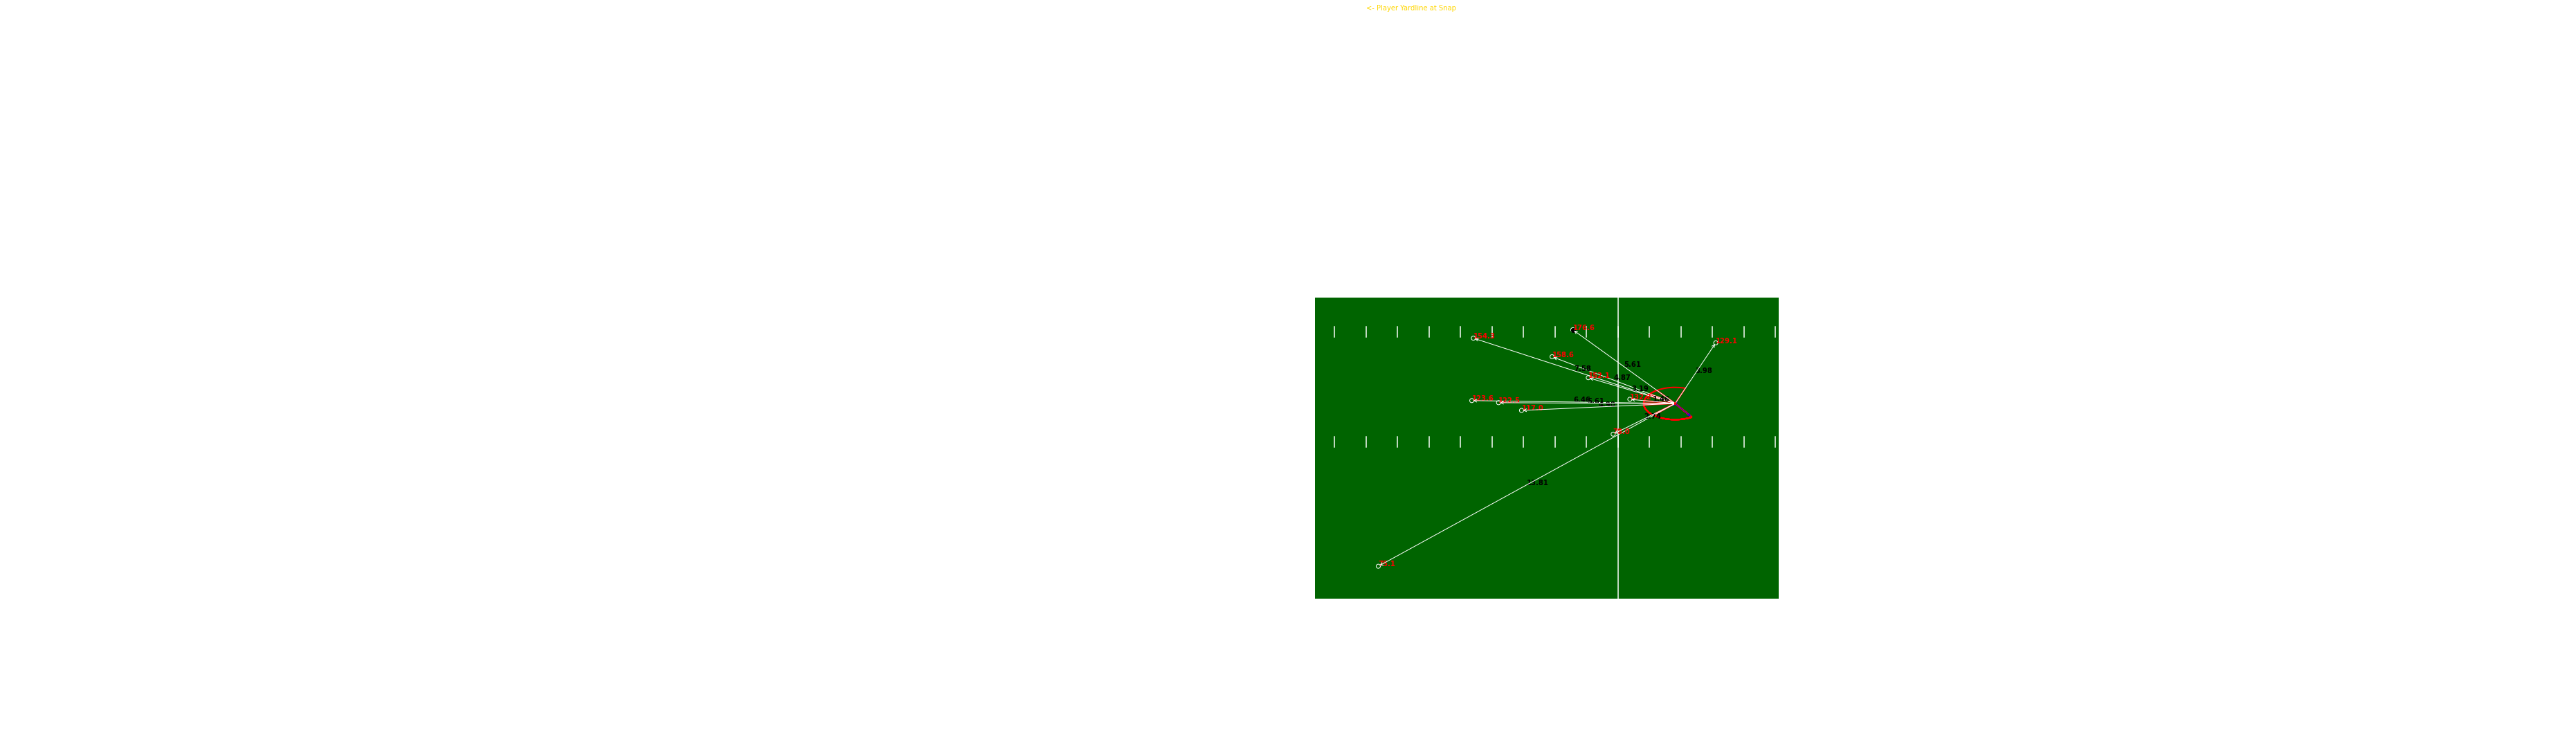

In [156]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.add_patch(rect)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white')
if True:
    plt.plot([60, 60], [0, 53.3], color='gold')
    plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
# Endzones
if True:
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
plt.xlim((tracking_sample_dist_angles["x"].min()-2,tracking_sample_dist_angles["x"].max()+2))
plt.ylim((tracking_sample_dist_angles["y"].min()-2,tracking_sample_dist_angles["y"].max()+2))
plt.axis('off')
if True:
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white', rotation=180)
if True:
    hash_range = range(11, 110)
else:
    hash_range = range(1, 120)

for x in hash_range:
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [22.91, 23.57], color='white')
    ax.plot([x, x], [29.73, 30.39], color='white')







#Add stuff to plot
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="DEN"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="DEN"]["y"], marker = "o", color = "white", facecolors = "None")
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="SF"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="SF"]["y"], marker = "x", color = "white", facecolors = "blue")
#Highlightball carrier
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53464]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53464]["y"], marker = "o", color = "black", facecolors = "black")

angle_degrees =  tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==47785]["unitDir"]
start_x = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==47785]["x"]
start_y = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==47785]["y"]
angle_radians = np.radians(angle_degrees) #need to flip radians because we are going opposite dirrection
length = 1
end_x = start_x + length * np.cos(angle_radians)
end_y = start_y + length * np.sin(angle_radians)

# Filter data for Nick Bosa
nick_bosa_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] == 'Nick Bosa']
other_players_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] != 'Nick Bosa']

# Extract the direction angle in radians for Nick Bosa
angle_degrees_bosa = nick_bosa_data["unitDir"].values[0]
angle_radians_bosa = np.radians(angle_degrees_bosa)



angles = []
for index, player_data in other_players_data.iterrows():
    # Calculate the relative x and y components between Nick Bosa and the player
    delta_x = player_data["x"] - nick_bosa_data["x"].values[0]
    delta_y = player_data["y"] - nick_bosa_data["y"].values[0]
    
    # Calculate the angle in radians
    angle_radians = np.arctan2(delta_y, delta_x)
    
    # Convert the angle to degrees and ensure it's within the [0, 360) range
    angle_degrees = (np.degrees(angle_radians))
    
    angles.append(angle_degrees)

#plot Bosa's arrow
arrow_props_Bosa = dict(facecolor='blue', edgecolor='blue', arrowstyle='->')
arrow_props_off = dict(facecolor='blue', edgecolor='white', arrowstyle='->')
plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_Bosa)

# Iterate through other players and create arrows
for player_data, angle_degrees_player in zip(other_players_data.iterrows(), angles):

    player_data = player_data[1]  # Extract player data from the iterrows result
    
    start_x = nick_bosa_data['x'].values[0]
    start_y = nick_bosa_data['y'].values[0]
    end_x = player_data['x']
    end_y = player_data['y']

    dx = end_x - start_x
    dy = end_y - start_y
    
    # Plot the angle
    angle_path = patches.Wedge((start_x, start_y), 1, angle_degrees_player, angle_degrees_bosa, edgecolor='red', linewidth=2, fill = False)
    ax.add_patch(angle_path)
    
    if (angle_degrees_player < 0).all():
        angle_degrees_player = 360 - abs(angle_degrees_player)
    #How far away is the angle of the player from the trajectory
    angle_degrees_player = abs(nick_bosa_data["unitDir"] - angle_degrees_player)
    #Orient angle correctly for player
    if (angle_degrees_player > 180).all():
        angle_degrees_player = 360 - angle_degrees_player
        
        
    angle_text = f'{angle_degrees_player.iloc[0]:.1f}'
    ax.text(end_x, end_y, angle_text, color='red', fontweight = "bold")

    # Calculate the distance
    distance = np.sqrt(dx**2 + dy**2)
    
    # Plot the distance as text (bold)
    plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, f'{distance:.2f}', fontsize=10, color='black', fontweight="bold")

    # Create an arrow with arrowheads turned off
    plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_off)
    



In [150]:
display(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="SF"])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
7,2022092513,3793,47785.0,Nick Bosa,40,2022-09-25 23:19:33.200000,97.0,SF,left,71.82,25.63,0.97,2.4,0.11,285.57,147.99,NaN,302.01,1.463284,2.736951,3.190235,3.975135,4.868069,4.898908,5.610223,6.462507,7.582256,13.810612,5.607798,132.244803,78.046245,152.111305,129.053669,158.573884,116.974402,122.520644,123.606064,154.295732,75.073483,176.591094


### Example 2: Frame with Darius Slay

In [192]:
tracking_samp = tracking[tracking["displayName"]=="Darius Slay"].sample(n=1, random_state = 44)
display(tracking_samp)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir
10568607,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,45.38,41.83,3.04,1.91,0.3,181.21,174.79,NaN,275.21


In [193]:
#find the ball Carrier
plays[(plays["gameId"]==2022103008)& (plays["playId"]==3594)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
9028,2022103008,3594,54905,Jaylen Warren,(10:35) (Shotgun) J.Warren up the middle to PH...,4,2,10,PIT,PHI,PHI,45,10:35,35,13,NaN,NaN,NaN,5,5,N,55,SHOTGUN,6.0,0.839316,0.997343,0.002657,0.000156,-0.000156,2.508853,-0.357353,NaN,NaN,NaN,NaN


In [194]:
tracking_sample_play = tracking[(tracking["gameId"]==2022103008) & (tracking["playId"]==3594)& (tracking["frameId"]==35)]
tracking_sample_dist_angles = tracking_sample_play.merge(calculate_distance_angles(tracking_sample_play, plays))
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
0,2022103008,3594,38542.0,Fletcher Cox,35,2022-10-30 15:35:37.700000,91.0,PHI,left,59.120000,28.07,1.70,2.95,0.17,238.04,285.40,NaN,164.60,1.556181,3.488968,4.491203,4.963839,6.344265,7.602644,8.441907,16.302396,24.46753,24.696674,7.756114,127.680003,109.509017,43.277374,176.340039,146.373531,128.559008,114.739586,22.978386,30.262349,81.107728,68.840365
1,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,45.380000,41.83,3.04,1.91,0.30,181.21,174.79,NaN,275.21,5.027644,16.092995,18.627735,20.889923,22.2022,23.751061,25.77814,26.654369,26.763412,36.446252,21.97213,143.273612,13.858716,26.423698,38.102465,33.848809,46.337402,38.768373,33.668019,29.162905,0.427073,19.313805
2,2022103008,3594,43351.0,James Bradberry,35,2022-10-30 15:35:37.700000,24.0,PHI,left,47.340000,5.43,1.92,2.89,0.20,337.97,299.68,NaN,150.32,1.625208,19.434469,20.952911,21.519187,21.974706,22.623583,23.931279,24.544997,27.290044,40.491011,17.904014,145.732022,102.901077,48.253891,103.662991,81.13849,92.443502,102.084764,90.583158,97.891152,52.77024,83.892573
3,2022103008,3594,43378.0,Javon Hargrave,35,2022-10-30 15:35:37.700000,97.0,PHI,left,63.080000,18.00,2.00,2.99,0.20,258.72,203.49,NaN,246.51,3.120208,3.229133,5.283787,7.562552,9.104592,9.264653,11.243033,18.818289,21.622692,34.69335,9.400106,100.403785,139.028957,158.679258,127.131611,162.183022,135.179441,111.65414,25.129309,87.996493,119.134739,90.62102
4,2022103008,3594,44825.0,Haason Reddick,35,2022-10-30 15:35:37.700000,7.0,PHI,left,57.490000,21.24,5.11,4.23,0.51,242.50,256.05,NaN,193.95,3.354102,3.841471,4.62277,5.277168,5.82928,6.138868,8.717368,15.265101,17.850022,28.83175,3.049607,139.484949,133.25088,164.066523,77.627726,126.335481,174.541028,152.06538,31.803346,47.503584,71.500146,25.296779
5,2022103008,3594,46108.0,James Daniels,35,2022-10-30 15:35:37.700000,78.0,PIT,left,63.980000,27.06,3.48,1.23,0.37,264.79,96.73,NaN,353.27,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,2022103008,3594,46161.0,Chukwuma Okorafor,35,2022-10-30 15:35:37.700000,76.0,PIT,left,55.150000,25.97,1.20,0.34,0.12,110.30,312.30,NaN,137.70,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022103008,3594,46166.0,Mason Cole,35,2022-10-30 15:35:37.700000,61.0,PIT,left,59.710000,26.63,0.78,0.98,0.08,185.56,66.78,NaN,23.22,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,2022103008,3594,46188.0,Kyzir White,35,2022-10-30 15:35:37.700000,43.0,PHI,left,59.980000,23.41,2.03,4.00,0.20,191.48,152.64,NaN,297.36,1.328345,3.156866,3.2313,3.30256,3.705267,5.415025,5.466489,17.204084,20.977676,28.524151,5.700465,179.976665,15.072403,157.433092,60.38406,19.448583,105.020451,145.284516,125.749144,59.049811,168.336294,101.373185
9,2022103008,3594,46194.0,Avonte Maddox,35,2022-10-30 15:35:37.700000,29.0,PHI,left,54.880000,22.13,5.18,4.94,0.51,232.68,239.30,NaN,210.70,3.84948,5.119736,6.097885,6.601432,7.305847,8.478355,10.349633,12.508017,17.595775,26.735991,0.478017,124.72199,178.017638,126.224785,167.725694,141.036807,157.095602,177.746985,48.338219,39.639605,91.949294,6.649349


In [195]:
#Get data for Darius Slay and all offensive players
tracking_sample_dist_angles = tracking_sample_dist_angles[(tracking_sample_dist_angles["club"]=="PIT")|(tracking_sample_dist_angles["nflId"] ==39984)]
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
1,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,45.38,41.83,3.04,1.91,0.30,181.21,174.79,NaN,275.21,5.027644,16.092995,18.627735,20.889923,22.2022,23.751061,25.77814,26.654369,26.763412,36.446252,21.97213,143.273612,13.858716,26.423698,38.102465,33.848809,46.337402,38.768373,33.668019,29.162905,0.427073,19.313805
5,2022103008,3594,46108.0,James Daniels,35,2022-10-30 15:35:37.700000,78.0,PIT,left,63.98,27.06,3.48,1.23,0.37,264.79,96.73,NaN,353.27,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,2022103008,3594,46161.0,Chukwuma Okorafor,35,2022-10-30 15:35:37.700000,76.0,PIT,left,55.15,25.97,1.20,0.34,0.12,110.30,312.30,NaN,137.70,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022103008,3594,46166.0,Mason Cole,35,2022-10-30 15:35:37.700000,61.0,PIT,left,59.71,26.63,0.78,0.98,0.08,185.56,66.78,NaN,23.22,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11,2022103008,3594,47876.0,Miles Boykin,35,2022-10-30 15:35:37.700000,13.0,PIT,left,42.02,45.57,6.60,1.00,0.66,239.96,282.95,NaN,167.05,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
14,2022103008,3594,48051.0,Steven Sims,35,2022-10-30 15:35:37.700000,82.0,PIT,left,42.96,25.92,7.63,1.49,0.77,233.73,222.08,NaN,227.92,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
16,2022103008,3594,52543.0,Kevin Dotson,35,2022-10-30 15:35:37.700000,69.0,PIT,left,62.11,21.08,0.57,1.89,0.05,270.83,58.26,NaN,31.74,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
17,2022103008,3594,53557.0,Dan Moore,35,2022-10-30 15:35:37.700000,65.0,PIT,left,60.49,19.74,2.00,1.40,0.20,233.38,253.86,NaN,196.14,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
18,2022103008,3594,54485.0,Kenny Pickett,35,2022-10-30 15:35:37.700000,8.0,PIT,left,63.28,23.28,1.37,1.40,0.14,284.45,101.63,NaN,348.37,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
19,2022103008,3594,54517.0,George Pickens,35,2022-10-30 15:35:37.700000,14.0,PIT,left,48.96,5.56,1.35,2.39,0.15,356.74,260.11,NaN,189.89,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


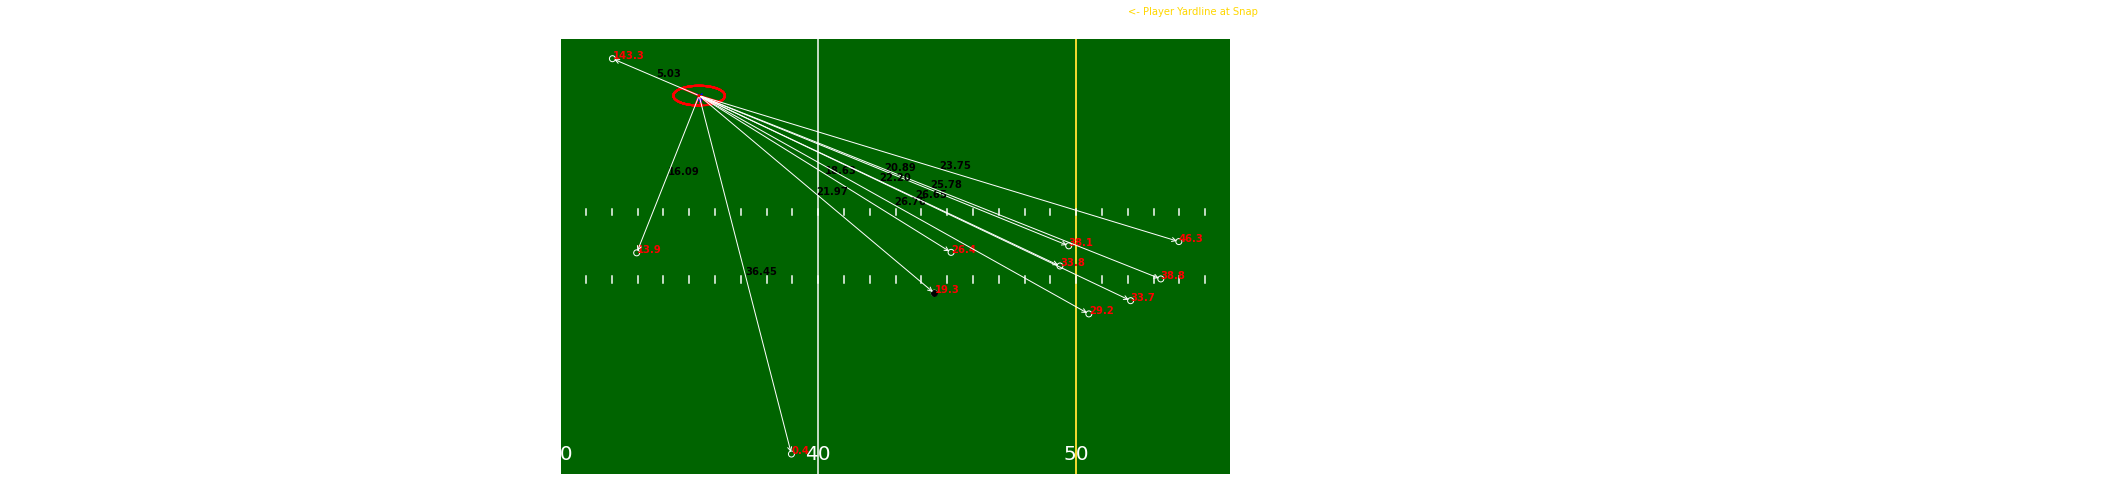

In [196]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.add_patch(rect)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white')
if True:
    plt.plot([60, 60], [0, 53.3], color='gold')
    plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
# Endzones
if True:
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
plt.xlim((tracking_sample_dist_angles["x"].min()-2,tracking_sample_dist_angles["x"].max()+2))
plt.ylim((tracking_sample_dist_angles["y"].min()-2,tracking_sample_dist_angles["y"].max()+2))
plt.axis('off')
if True:
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white', rotation=180)
if True:
    hash_range = range(11, 110)
else:
    hash_range = range(1, 120)

for x in hash_range:
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [22.91, 23.57], color='white')
    ax.plot([x, x], [29.73, 30.39], color='white')







#Add stuff to plot
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PIT"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PIT"]["y"], marker = "o", color = "white", facecolors = "None")
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PHI"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PHI"]["y"], marker = "x", color = "white", facecolors = "blue")
#Highlightball carrier
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==54905]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==54905]["y"], marker = "o", color = "black", facecolors = "black")

angle_degrees =  tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==39984]["unitDir"]
start_x = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==39984]["x"]
start_y = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==39984]["y"]
angle_radians = np.radians(angle_degrees) #need to flip radians because we are going opposite dirrection
length = 1
end_x = start_x + length * np.cos(angle_radians)
end_y = start_y + length * np.sin(angle_radians)

# Filter data for Darius Slay
slay_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] == 'Darius Slay']
other_players_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] != 'Darius Slay']

# Extract the direction angle in radians for Darius Slay
angle_degrees_slay = slay_data["unitDir"].values[0]
angle_radians_slay = np.radians(angle_degrees_slay)



angles = []
for index, player_data in other_players_data.iterrows():
    # Calculate the relative x and y components between Nick Bosa and the player
    delta_x = player_data["x"] - slay_data["x"].values[0]
    delta_y = player_data["y"] - slay_data["y"].values[0]
    
    # Calculate the angle in radians
    angle_radians = np.arctan2(delta_y, delta_x)
    
    # Convert the angle to degrees and ensure it's within the [0, 360) range
    angle_degrees = (np.degrees(angle_radians))
    
    angles.append(angle_degrees)

#plot Bosa's arrow
arrow_props_slay = dict(facecolor='blue', edgecolor='blue', arrowstyle='->')
arrow_props_off = dict(facecolor='blue', edgecolor='white', arrowstyle='->')
plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_slay)

# Iterate through other players and create arrows
for player_data, angle_degrees_player in zip(other_players_data.iterrows(), angles):

    player_data = player_data[1]  # Extract player data from the iterrows result
    
    start_x = slay_data['x'].values[0]
    start_y = slay_data['y'].values[0]
    end_x = player_data['x']
    end_y = player_data['y']

    dx = end_x - start_x
    dy = end_y - start_y
    
    # Plot the angle
    angle_path = patches.Wedge((start_x, start_y), 1, angle_degrees_player, angle_degrees_slay, edgecolor='red', linewidth=2, fill = False)
    ax.add_patch(angle_path)
    
    if (angle_degrees_player < 0).all():
        angle_degrees_player = 360 - abs(angle_degrees_player)
    #How far away is the angle of the player from the trajectory
    angle_degrees_player = abs(slay_data["unitDir"] - angle_degrees_player)
    #Orient angle correctly for player
    if (angle_degrees_player > 180).all():
        angle_degrees_player = 360 - angle_degrees_player
        
        
    angle_text = f'{angle_degrees_player.iloc[0]:.1f}'
    ax.text(end_x, end_y, angle_text, color='red', fontweight = "bold")

    # Calculate the distance
    distance = np.sqrt(dx**2 + dy**2)
    
    # Plot the distance as text (bold)
    plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, f'{distance:.2f}', fontsize=10, color='black', fontweight="bold")

    # Create an arrow with arrowheads turned off
    plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_off)
    



In [197]:
tracking_sample_dist_angles[(tracking_sample_dist_angles["club"]=="PHI")]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
1,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,45.38,41.83,3.04,1.91,0.3,181.21,174.79,NaN,275.21,5.027644,16.092995,18.627735,20.889923,22.2022,23.751061,25.77814,26.654369,26.763412,36.446252,21.97213,143.273612,13.858716,26.423698,38.102465,33.848809,46.337402,38.768373,33.668019,29.162905,0.427073,19.313805


### Example 3: Micah Parsons

In [199]:
tracking_samp = tracking[tracking["displayName"]=="Micah Parsons"].sample(n=1, random_state = 1)
display(tracking_samp)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir
4153176,2022092600,2095,53441.0,Micah Parsons,12,2022-09-26 21:55:16.400000,11.0,DAL,right,38.27,25.7,0.01,0.35,0.05,291.74,210.73,NaN,239.27


In [200]:
#find the ball Carrier
plays[(plays["gameId"]==2022092600)& (plays["playId"]==2095)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
2710,2022092600,2095,46071,Saquon Barkley,(13:38) S.Barkley right end to NYG 29 for 3 ya...,3,1,10,NYG,DAL,NYG,26,13:38,3,6,NaN,NaN,NaN,3,3,N,36,SINGLEBACK,6.0,0.49939,0.37502,0.62498,-0.007971,0.007971,1.343688,-0.323894,NaN,NaN,NaN,NaN


In [201]:
tracking_sample_play = tracking[(tracking["gameId"]==2022092600) & (tracking["playId"]==2095)& (tracking["frameId"]==25)]
tracking_sample_dist_angles = tracking_sample_play.merge(calculate_distance_angles(tracking_sample_play, plays))
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
0,2022092600,2095,42346.0,Dante Fowler,25,2022-09-26 21:55:17.700000,56.0,DAL,right,35.250000,20.59,4.34,0.51,0.43,270.06,168.96,NaN,281.04,0.616847,0.85,2.517956,2.931245,3.47121,5.335401,5.842885,7.952037,9.924717,18.517192,5.008882,118.006148,162.967513,163.86436,159.337006,5.358855,168.560566,177.479427,18.329528,150.125617,156.48489,138.985211
1,2022092600,2095,42471.0,Jon Feliciano,25,2022-09-26 21:55:17.700000,76.0,NYG,right,35.740000,23.48,4.54,0.96,0.47,177.07,167.20,NaN,282.80,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2022092600,2095,42477.0,Mark Glowinski,25,2022-09-26 21:55:17.700000,64.0,NYG,right,34.100000,22.83,4.50,1.38,0.47,111.25,185.41,NaN,264.59,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2022092600,2095,43329.0,Sterling Shepard,25,2022-09-26 21:55:17.700000,3.0,NYG,right,39.150000,13.66,4.32,2.64,0.45,94.80,67.11,NaN,22.89,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2022092600,2095,43478.0,Anthony Brown,25,2022-09-26 21:55:17.700000,3.0,DAL,right,43.700000,12.38,1.60,2.34,0.15,265.70,235.20,NaN,214.80,4.726616,8.922741,12.333438,12.593812,13.659121,14.190226,16.813676,17.010717,21.686553,26.663957,16.769738,50.512284,67.955774,77.664314,80.153872,89.155045,82.227545,86.198733,89.540322,81.219957,115.19284,77.117356
5,2022092600,2095,44827.0,Malik Hooker,25,2022-09-26 21:55:17.700000,28.0,DAL,right,47.260000,22.83,3.37,5.34,0.34,270.24,242.47,NaN,207.53,11.538323,12.241773,12.35661,12.499128,12.767286,13.16,13.815137,14.305195,17.75009,19.242861,15.98209,30.759411,20.980273,0.736845,20.683586,18.244744,27.53,41.948478,38.368632,90.705106,43.393597,30.542788
6,2022092600,2095,44904.0,Jourdan Lewis,25,2022-09-26 21:55:17.700000,2.0,DAL,right,36.810000,16.74,4.18,0.42,0.42,286.98,171.54,NaN,278.46,0.778974,3.868074,4.567647,5.00016,6.665748,6.824405,9.489384,9.970246,13.920708,22.065323,8.85353,140.33787,28.765399,160.380134,165.381779,164.471329,179.439361,166.165254,171.369946,153.080214,165.191206,149.972008
7,2022092600,2095,46071.0,Saquon Barkley,25,2022-09-26 21:55:17.700000,26.0,NYG,right,31.300000,23.67,6.52,1.09,0.66,137.27,159.59,NaN,290.41,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,2022092600,2095,46088.0,Leighton Vander Esch,25,2022-09-26 21:55:17.700000,55.0,DAL,right,38.510000,24.54,5.92,0.28,0.59,237.94,193.17,NaN,256.83,2.965889,4.729926,4.861646,4.942651,5.388451,5.389842,7.628683,10.385572,10.898807,14.149364,7.2623,55.889577,55.635944,35.666248,97.318207,32.431508,87.305992,4.219868,96.81782,16.536461,169.827889,69.949627
9,2022092600,2095,47789.0,Daniel Jones,25,2022-09-26 21:55:17.700000,8.0,NYG,right,28.750000,28.09,3.80,4.77,0.38,333.17,306.32,NaN,143.68,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [202]:
#Get data for Michah and all offensive players
tracking_sample_dist_angles = tracking_sample_dist_angles[(tracking_sample_dist_angles["club"]=="NYG")|(tracking_sample_dist_angles["nflId"] ==53441)]
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
1,2022092600,2095,42471.0,Jon Feliciano,25,2022-09-26 21:55:17.700000,76.0,NYG,right,35.74,23.48,4.54,0.96,0.47,177.07,167.20,NaN,282.80,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2022092600,2095,42477.0,Mark Glowinski,25,2022-09-26 21:55:17.700000,64.0,NYG,right,34.10,22.83,4.50,1.38,0.47,111.25,185.41,NaN,264.59,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2022092600,2095,43329.0,Sterling Shepard,25,2022-09-26 21:55:17.700000,3.0,NYG,right,39.15,13.66,4.32,2.64,0.45,94.80,67.11,NaN,22.89,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022092600,2095,46071.0,Saquon Barkley,25,2022-09-26 21:55:17.700000,26.0,NYG,right,31.30,23.67,6.52,1.09,0.66,137.27,159.59,NaN,290.41,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,2022092600,2095,47789.0,Daniel Jones,25,2022-09-26 21:55:17.700000,8.0,NYG,right,28.75,28.09,3.80,4.77,0.38,333.17,306.32,NaN,143.68,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
12,2022092600,2095,48475.0,Chris Myarick,25,2022-09-26 21:55:17.700000,85.0,NYG,right,34.66,20.77,3.94,0.90,0.39,118.85,169.79,NaN,280.21,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13,2022092600,2095,48489.0,David Sills,25,2022-09-26 21:55:17.700000,13.0,NYG,right,39.25,38.67,5.84,0.27,0.59,109.54,135.67,NaN,314.33,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
14,2022092600,2095,52412.0,Andrew Thomas,25,2022-09-26 21:55:17.700000,78.0,NYG,right,33.88,26.27,4.33,1.72,0.45,160.05,180.06,NaN,269.94,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
17,2022092600,2095,52551.0,Ben Bredeson,25,2022-09-26 21:55:17.700000,68.0,NYG,right,33.21,25.52,2.09,3.16,0.22,247.80,193.11,NaN,256.89,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
18,2022092600,2095,53441.0,Micah Parsons,25,2022-09-26 21:55:17.700000,11.0,DAL,right,36.77,21.47,4.58,2.77,0.46,173.10,187.35,NaN,262.65,1.924396,2.223083,2.258539,2.996415,4.244491,5.392226,5.602865,8.164588,10.399269,17.377871,5.895838,78.77651,64.296553,145.517682,109.642624,0.040807,131.33413,141.598555,24.297946,122.187506,179.145294,104.559685


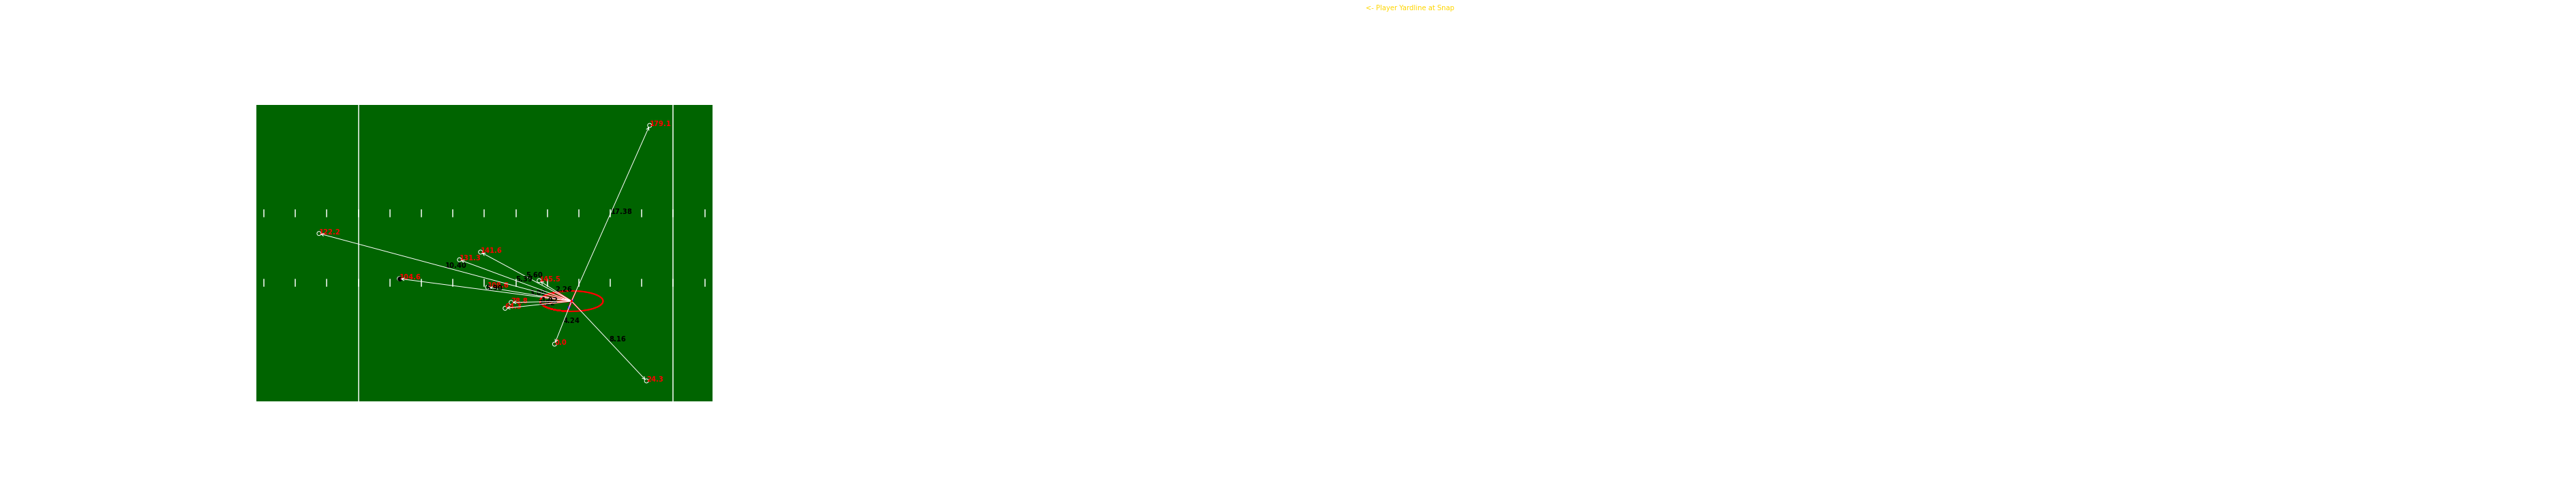

In [203]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.add_patch(rect)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white')
if True:
    plt.plot([60, 60], [0, 53.3], color='gold')
    plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
# Endzones
if True:
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
plt.xlim((tracking_sample_dist_angles["x"].min()-2,tracking_sample_dist_angles["x"].max()+2))
plt.ylim((tracking_sample_dist_angles["y"].min()-2,tracking_sample_dist_angles["y"].max()+2))
plt.axis('off')
if True:
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white', rotation=180)
if True:
    hash_range = range(11, 110)
else:
    hash_range = range(1, 120)

for x in hash_range:
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [22.91, 23.57], color='white')
    ax.plot([x, x], [29.73, 30.39], color='white')







#Add stuff to plot
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="NYG"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="NYG"]["y"], marker = "o", color = "white", facecolors = "None")
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="DAL"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="DAL"]["y"], marker = "x", color = "white", facecolors = "blue")
#Highlightball carrier
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==46071]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==46071]["y"], marker = "o", color = "black", facecolors = "black")

angle_degrees =  tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53441]["unitDir"]
start_x = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53441]["x"]
start_y = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53441]["y"]
angle_radians = np.radians(angle_degrees) #need to flip radians because we are going opposite dirrection
length = 1
end_x = start_x + length * np.cos(angle_radians)
end_y = start_y + length * np.sin(angle_radians)

# Filter data for parsons
parsons_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] == 'Micah Parsons']
other_players_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] != 'Micah Parsons']

# Extract the direction angle in radians for parsons
angle_degrees_parsons = parsons_data["unitDir"].values[0]
angle_radians_parsons = np.radians(angle_degrees_parsons)



angles = []
for index, player_data in other_players_data.iterrows():
    # Calculate the relative x and y components between Nick Bosa and the player
    delta_x = player_data["x"] - parsons_data["x"].values[0]
    delta_y = player_data["y"] - parsons_data["y"].values[0]
    
    # Calculate the angle in radians
    angle_radians = np.arctan2(delta_y, delta_x)
    
    # Convert the angle to degrees and ensure it's within the [0, 360) range
    angle_degrees = (np.degrees(angle_radians))
    
    angles.append(angle_degrees)

#plot parsons's arrow
arrow_props_parsons = dict(facecolor='blue', edgecolor='blue', arrowstyle='->')
arrow_props_off = dict(facecolor='blue', edgecolor='white', arrowstyle='->')
plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_parsons)

# Iterate through other players and create arrows
for player_data, angle_degrees_player in zip(other_players_data.iterrows(), angles):

    player_data = player_data[1]  # Extract player data from the iterrows result
    
    start_x = parsons_data['x'].values[0]
    start_y = parsons_data['y'].values[0]
    end_x = player_data['x']
    end_y = player_data['y']

    dx = end_x - start_x
    dy = end_y - start_y
    
    # Plot the angle
    angle_path = patches.Wedge((start_x, start_y), 1, angle_degrees_player, angle_degrees_parsons, edgecolor='red', linewidth=2, fill = False)
    ax.add_patch(angle_path)
    
    if (angle_degrees_player < 0).all():
        angle_degrees_player = 360 - abs(angle_degrees_player)
    #How far away is the angle of the player from the trajectory
    angle_degrees_player = abs(parsons_data["unitDir"] - angle_degrees_player)
    #Orient angle correctly for player
    if (angle_degrees_player > 180).all():
        angle_degrees_player = 360 - angle_degrees_player
        
        
    angle_text = f'{angle_degrees_player.iloc[0]:.1f}'
    ax.text(end_x, end_y, angle_text, color='red', fontweight = "bold")

    # Calculate the distance
    distance = np.sqrt(dx**2 + dy**2)
    
    # Plot the distance as text (bold)
    plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, f'{distance:.2f}', fontsize=10, color='black', fontweight="bold")

    # Create an arrow with arrowheads turned off
    plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_off)
    



In [179]:
tracking_sample_dist_angles[(tracking_sample_dist_angles["club"]=="DAL")]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
18,2022092600,2095,53441.0,Micah Parsons,25,2022-09-26 21:55:17.700000,11.0,DAL,right,36.77,21.47,4.58,2.77,0.46,173.1,187.35,NaN,262.65,1.924396,2.223083,2.258539,2.996415,4.244491,5.392226,5.602865,8.164588,10.399269,17.377871,5.895838,78.77651,64.296553,145.517682,109.642624,0.040807,131.33413,141.598555,24.297946,122.187506,179.145294,104.559685


Everything looks good from the right

## Double check the standardization

In [216]:
#Apply transformations to get unit circle for orientation and direction
tracking["unitDir"] = tracking["dir"].apply(orient_angle)
tracking["unitO"] = tracking["o"].apply(orient_angle)
display(tracking)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,302.10,218.26
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,301.47,219.02
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,302.95,219.02
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,304.58,217.62
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,308.05,216.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,NaN,NaN
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,NaN,NaN
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,NaN,NaN


In [217]:
tracking_standard = standardize_field(tracking)
display(tracking_standard)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,231.74,147.90,NaN,122.10,38.26
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,230.98,148.53,pass_arrived,121.47,39.02
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,230.98,147.05,NaN,122.95,39.02
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,232.38,145.42,NaN,124.58,37.62
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,233.36,141.95,NaN,128.05,36.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,NaN,NaN
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,NaN,NaN
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,NaN,NaN


### Check everything with angles feature for the first two

In [218]:
tracking_samp = tracking_standard[(tracking_standard["gameId"]==2022092513)&(tracking_standard["nflId"]==38605)].sample(n=1, random_state = 1234444)
display(tracking_samp)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO
4100523,2022092513,3793,38605.0,Russell Wilson,20,2022-09-25 23:19:31.200000,3.0,DEN,left,47.61,24.623333,3.69,0.56,0.37,141.14,108.71,NaN,161.29,128.86


In [219]:
#find the ball Carrier
plays[(plays["gameId"]==2022092513)& (plays["playId"]==3793)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
3014,2022092513,3793,53464,Javonte Williams,(2:06) J.Williams up the middle to DEN 43 for ...,4,1,10,DEN,SF,DEN,42,2:06,11,10,NaN,NaN,NaN,1,1,N,68,SINGLEBACK,8.0,0.109284,0.803921,0.196079,-0.010974,0.010974,2.086148,-0.476803,NaN,NaN,NaN,NaN


In [220]:
tracking_sample_play = tracking[(tracking["gameId"]==2022092513) & (tracking["playId"]==3793)& (tracking["frameId"]==40)]
tracking_sample_dist_angles = tracking_sample_play[(tracking_sample_play["club"]=="DEN")|(tracking_sample_play["nflId"] ==47785)]
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO
4100543,2022092513,3793,38605.0,Russell Wilson,40,2022-09-25 23:19:33.200000,3.0,DEN,left,46.89,23.943333,2.33,0.51,0.23,289.22,315.59,NaN,314.41,340.78
4100641,2022092513,3793,41369.0,Cameron Fleming,40,2022-09-25 23:19:33.200000,73.0,DEN,left,52.09,24.803333,1.01,0.83,0.10,346.61,337.73,NaN,292.27,283.39
4100690,2022092513,3793,42721.0,Eric Tomlinson,40,2022-09-25 23:19:33.200000,87.0,DEN,left,54.59,23.653333,1.56,3.23,0.16,346.95,319.92,NaN,310.08,283.05
4100739,2022092513,3793,43384.0,Graham Glasgow,40,2022-09-25 23:19:33.200000,61.0,DEN,left,54.64,27.523333,2.01,1.67,0.21,275.29,254.90,NaN,15.10,354.71
4100837,2022092513,3793,44832.0,Garett Bolles,40,2022-09-25 23:19:33.200000,72.0,DEN,left,50.94,26.103333,3.37,0.11,0.34,322.26,346.07,NaN,283.93,307.74
4100935,2022092513,3793,44987.0,Eric Saubert,40,2022-09-25 23:19:33.200000,82.0,DEN,left,49.62,27.443333,1.23,1.97,0.13,33.04,192.73,NaN,77.27,236.96
4100984,2022092513,3793,46109.0,Courtland Sutton,40,2022-09-25 23:19:33.200000,14.0,DEN,left,57.61,37.793333,5.25,1.05,0.52,309.44,335.81,NaN,294.19,320.56
4101180,2022092513,3793,47785.0,Nick Bosa,40,2022-09-25 23:19:33.200000,97.0,SF,left,48.18,27.703333,0.97,2.40,0.11,285.57,147.99,NaN,122.01,344.43
4101229,2022092513,3793,47824.0,Dalton Risner,40,2022-09-25 23:19:33.200000,66.0,DEN,left,53.06,28.133333,1.66,0.48,0.17,317.32,241.18,NaN,28.82,312.68
4101327,2022092513,3793,48096.0,Andrew Beck,40,2022-09-25 23:19:33.200000,83.0,DEN,left,50.15,29.603333,0.34,0.73,0.03,358.27,197.16,NaN,72.84,271.73


In [221]:
#Get data for Nick Bosa and all offensive players
tracking_sample_dist_angles = tracking_sample_dist_angles.merge(calculate_distance_angles(tracking_sample_dist_angles, plays))
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
0,2022092513,3793,38605.0,Russell Wilson,40,2022-09-25 23:19:33.200000,3.0,DEN,left,46.89,23.943333,2.33,0.51,0.23,289.22,315.59,NaN,314.41,340.78,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2022092513,3793,41369.0,Cameron Fleming,40,2022-09-25 23:19:33.200000,73.0,DEN,left,52.09,24.803333,1.01,0.83,0.10,346.61,337.73,NaN,292.27,283.39,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2022092513,3793,42721.0,Eric Tomlinson,40,2022-09-25 23:19:33.200000,87.0,DEN,left,54.59,23.653333,1.56,3.23,0.16,346.95,319.92,NaN,310.08,283.05,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2022092513,3793,43384.0,Graham Glasgow,40,2022-09-25 23:19:33.200000,61.0,DEN,left,54.64,27.523333,2.01,1.67,0.21,275.29,254.90,NaN,15.10,354.71,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2022092513,3793,44832.0,Garett Bolles,40,2022-09-25 23:19:33.200000,72.0,DEN,left,50.94,26.103333,3.37,0.11,0.34,322.26,346.07,NaN,283.93,307.74,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,2022092513,3793,44987.0,Eric Saubert,40,2022-09-25 23:19:33.200000,82.0,DEN,left,49.62,27.443333,1.23,1.97,0.13,33.04,192.73,NaN,77.27,236.96,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,2022092513,3793,46109.0,Courtland Sutton,40,2022-09-25 23:19:33.200000,14.0,DEN,left,57.61,37.793333,5.25,1.05,0.52,309.44,335.81,NaN,294.19,320.56,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022092513,3793,47785.0,Nick Bosa,40,2022-09-25 23:19:33.200000,97.0,SF,left,48.18,27.703333,0.97,2.40,0.11,285.57,147.99,NaN,122.01,344.43,1.463284,2.736951,3.190235,3.975135,4.868069,4.898908,5.610223,6.462507,7.582256,13.810612,5.607798,132.244803,78.046245,152.111305,129.053669,158.573884,116.974402,122.520644,123.606064,154.295732,75.073483,176.591094
8,2022092513,3793,47824.0,Dalton Risner,40,2022-09-25 23:19:33.200000,66.0,DEN,left,53.06,28.133333,1.66,0.48,0.17,317.32,241.18,NaN,28.82,312.68,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,2022092513,3793,48096.0,Andrew Beck,40,2022-09-25 23:19:33.200000,83.0,DEN,left,50.15,29.603333,0.34,0.73,0.03,358.27,197.16,NaN,72.84,271.73,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


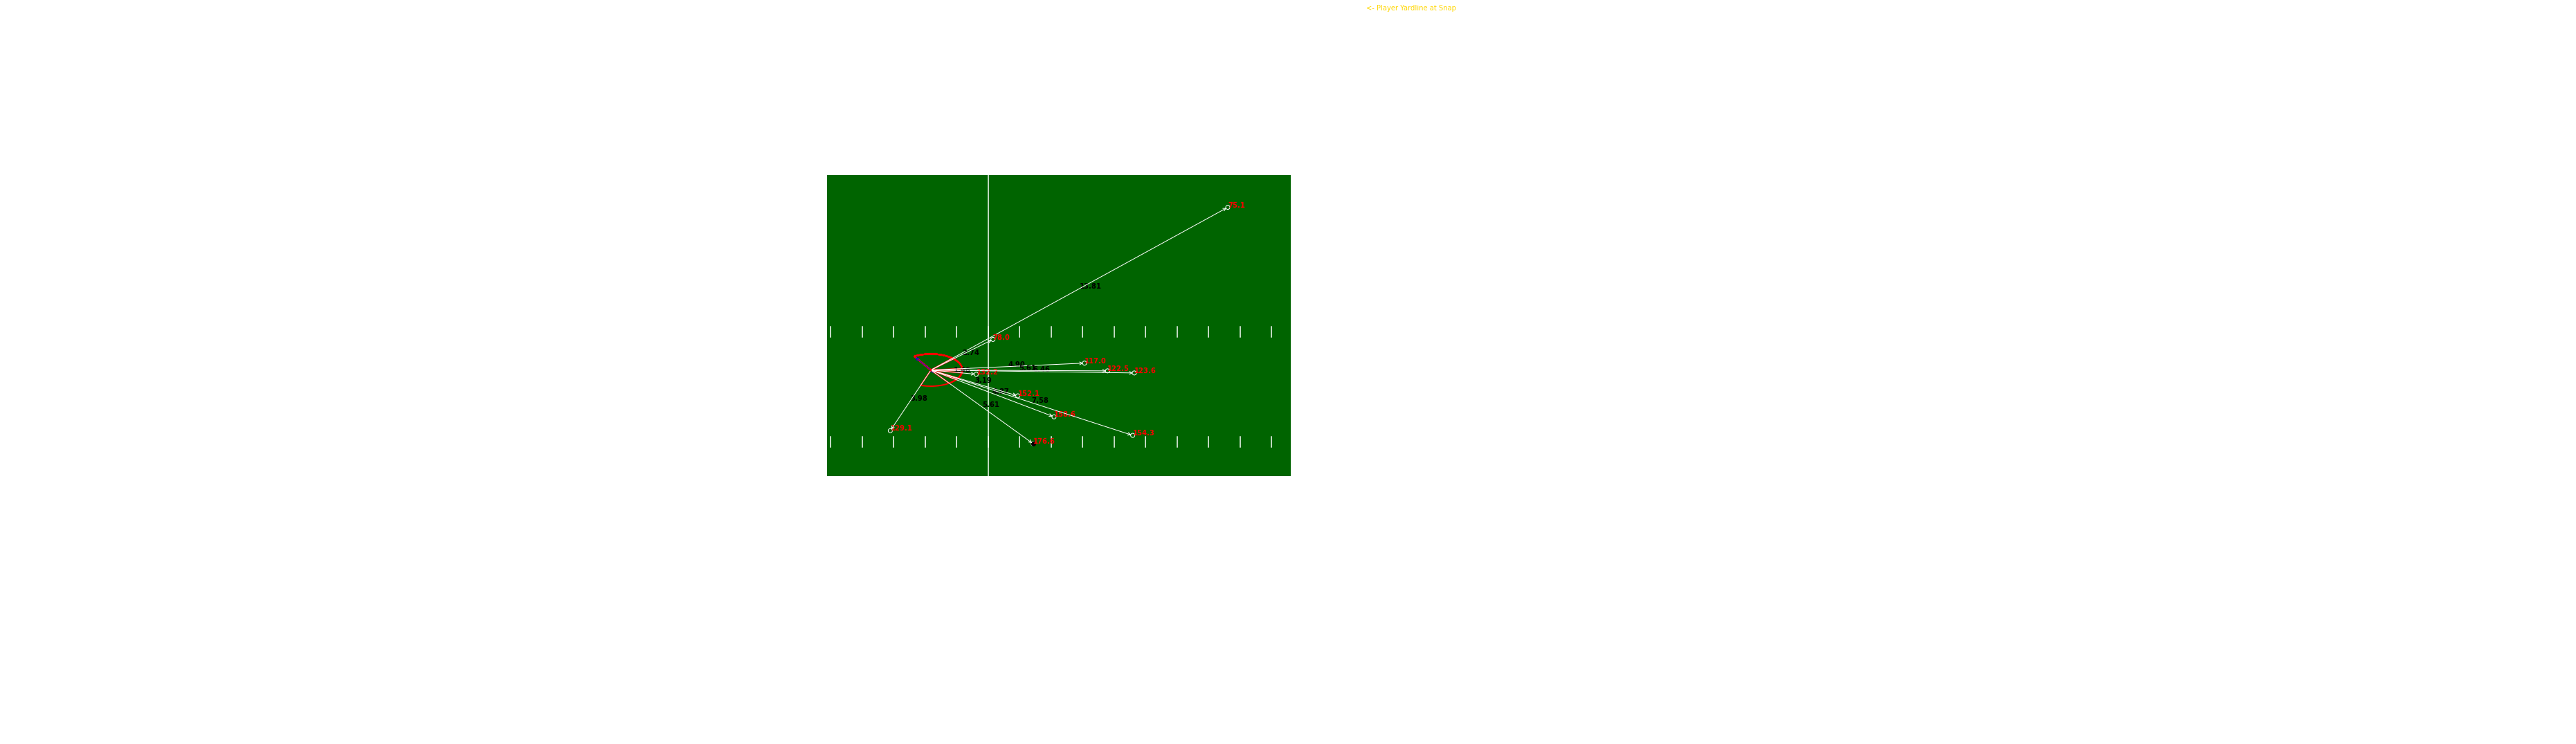

In [222]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.add_patch(rect)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white')
if True:
    plt.plot([60, 60], [0, 53.3], color='gold')
    plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
# Endzones
if True:
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
plt.xlim((tracking_sample_dist_angles["x"].min()-2,tracking_sample_dist_angles["x"].max()+2))
plt.ylim((tracking_sample_dist_angles["y"].min()-2,tracking_sample_dist_angles["y"].max()+2))
plt.axis('off')
if True:
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white', rotation=180)
if True:
    hash_range = range(11, 110)
else:
    hash_range = range(1, 120)

for x in hash_range:
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [22.91, 23.57], color='white')
    ax.plot([x, x], [29.73, 30.39], color='white')







#Add stuff to plot
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="DEN"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="DEN"]["y"], marker = "o", color = "white", facecolors = "None")
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="SF"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="SF"]["y"], marker = "x", color = "white", facecolors = "blue")
#Highlightball carrier
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53464]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==53464]["y"], marker = "o", color = "black", facecolors = "black")

angle_degrees =  tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==47785]["unitDir"]
start_x = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==47785]["x"]
start_y = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==47785]["y"]
angle_radians = np.radians(angle_degrees) #need to flip radians because we are going opposite dirrection
length = 1
end_x = start_x + length * np.cos(angle_radians)
end_y = start_y + length * np.sin(angle_radians)

# Filter data for Nick Bosa
nick_bosa_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] == 'Nick Bosa']
other_players_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] != 'Nick Bosa']

# Extract the direction angle in radians for Nick Bosa
angle_degrees_bosa = nick_bosa_data["unitDir"].values[0]
angle_radians_bosa = np.radians(angle_degrees_bosa)



angles = []
for index, player_data in other_players_data.iterrows():
    # Calculate the relative x and y components between Nick Bosa and the player
    delta_x = player_data["x"] - nick_bosa_data["x"].values[0]
    delta_y = player_data["y"] - nick_bosa_data["y"].values[0]
    
    # Calculate the angle in radians
    angle_radians = np.arctan2(delta_y, delta_x)
    
    # Convert the angle to degrees and ensure it's within the [0, 360) range
    angle_degrees = (np.degrees(angle_radians))
    
    angles.append(angle_degrees)

#plot Bosa's arrow
arrow_props_Bosa = dict(facecolor='blue', edgecolor='blue', arrowstyle='->')
arrow_props_off = dict(facecolor='blue', edgecolor='white', arrowstyle='->')
plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_Bosa)

# Iterate through other players and create arrows
for player_data, angle_degrees_player in zip(other_players_data.iterrows(), angles):

    player_data = player_data[1]  # Extract player data from the iterrows result
    
    start_x = nick_bosa_data['x'].values[0]
    start_y = nick_bosa_data['y'].values[0]
    end_x = player_data['x']
    end_y = player_data['y']

    dx = end_x - start_x
    dy = end_y - start_y
    
    # Plot the angle
    angle_path = patches.Wedge((start_x, start_y), 1, angle_degrees_player, angle_degrees_bosa, edgecolor='red', linewidth=2, fill = False)
    ax.add_patch(angle_path)
    
    if (angle_degrees_player < 0).all():
        angle_degrees_player = 360 - abs(angle_degrees_player)
    #How far away is the angle of the player from the trajectory
    angle_degrees_player = abs(nick_bosa_data["unitDir"] - angle_degrees_player)
    #Orient angle correctly for player
    if (angle_degrees_player > 180).all():
        angle_degrees_player = 360 - angle_degrees_player
        
        
    angle_text = f'{angle_degrees_player.iloc[0]:.1f}'
    ax.text(end_x, end_y, angle_text, color='red', fontweight = "bold")

    # Calculate the distance
    distance = np.sqrt(dx**2 + dy**2)
    
    # Plot the distance as text (bold)
    plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, f'{distance:.2f}', fontsize=10, color='black', fontweight="bold")

    # Create an arrow with arrowheads turned off
    plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_off)
    



In [223]:
display(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="SF"])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
7,2022092513,3793,47785.0,Nick Bosa,40,2022-09-25 23:19:33.200000,97.0,SF,left,48.18,27.703333,0.97,2.4,0.11,285.57,147.99,NaN,122.01,344.43,1.463284,2.736951,3.190235,3.975135,4.868069,4.898908,5.610223,6.462507,7.582256,13.810612,5.607798,132.244803,78.046245,152.111305,129.053669,158.573884,116.974402,122.520644,123.606064,154.295732,75.073483,176.591094


### Checking Darius Slay

In [224]:
tracking_samp = tracking_standard[tracking_standard["displayName"]=="Darius Slay"].sample(n=1, random_state = 44)
display(tracking_samp)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO
10568607,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,74.62,11.503333,3.04,1.91,0.3,181.21,174.79,NaN,95.21,88.79


In [225]:
#find the ball Carrier
plays[(plays["gameId"]==2022103008)& (plays["playId"]==3594)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
9028,2022103008,3594,54905,Jaylen Warren,(10:35) (Shotgun) J.Warren up the middle to PH...,4,2,10,PIT,PHI,PHI,45,10:35,35,13,NaN,NaN,NaN,5,5,N,55,SHOTGUN,6.0,0.839316,0.997343,0.002657,0.000156,-0.000156,2.508853,-0.357353,NaN,NaN,NaN,NaN


In [226]:
tracking_sample_play = tracking[(tracking["gameId"]==2022103008) & (tracking["playId"]==3594)& (tracking["frameId"]==35)]
tracking_sample_dist_angles = tracking_sample_play.merge(calculate_distance_angles(tracking_sample_play, plays))
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
0,2022103008,3594,38542.0,Fletcher Cox,35,2022-10-30 15:35:37.700000,91.0,PHI,left,60.880000,25.263333,1.70,2.95,0.17,238.04,285.40,NaN,344.60,31.96,1.556181,3.488968,4.491203,4.963839,6.344265,7.602644,8.441907,16.302396,24.46753,24.696674,7.756114,127.680003,109.509017,43.277374,176.340039,146.373531,128.559008,114.739586,22.978386,30.262349,81.107728,68.840365
1,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,74.620000,11.503333,3.04,1.91,0.30,181.21,174.79,NaN,95.21,88.79,5.027644,16.092995,18.627735,20.889923,22.2022,23.751061,25.77814,26.654369,26.763412,36.446252,21.97213,143.273612,13.858716,26.423698,38.102465,33.848809,46.337402,38.768373,33.668019,29.162905,0.427073,19.313805
2,2022103008,3594,43351.0,James Bradberry,35,2022-10-30 15:35:37.700000,24.0,PHI,left,72.660000,47.903333,1.92,2.89,0.20,337.97,299.68,NaN,330.32,292.03,1.625208,19.434469,20.952911,21.519187,21.974706,22.623583,23.931279,24.544997,27.290044,40.491011,17.904014,145.732022,102.901077,48.253891,103.662991,81.13849,92.443502,102.084764,90.583158,97.891152,52.77024,83.892573
3,2022103008,3594,43378.0,Javon Hargrave,35,2022-10-30 15:35:37.700000,97.0,PHI,left,56.920000,35.333333,2.00,2.99,0.20,258.72,203.49,NaN,66.51,11.28,3.120208,3.229133,5.283787,7.562552,9.104592,9.264653,11.243033,18.818289,21.622692,34.69335,9.400106,100.403785,139.028957,158.679258,127.131611,162.183022,135.179441,111.65414,25.129309,87.996493,119.134739,90.62102
4,2022103008,3594,44825.0,Haason Reddick,35,2022-10-30 15:35:37.700000,7.0,PHI,left,62.510000,32.093333,5.11,4.23,0.51,242.50,256.05,NaN,13.95,27.50,3.354102,3.841471,4.62277,5.277168,5.82928,6.138868,8.717368,15.265101,17.850022,28.83175,3.049607,139.484949,133.25088,164.066523,77.627726,126.335481,174.541028,152.06538,31.803346,47.503584,71.500146,25.296779
5,2022103008,3594,46108.0,James Daniels,35,2022-10-30 15:35:37.700000,78.0,PIT,left,56.020000,26.273333,3.48,1.23,0.37,264.79,96.73,NaN,173.27,5.21,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,2022103008,3594,46161.0,Chukwuma Okorafor,35,2022-10-30 15:35:37.700000,76.0,PIT,left,64.850000,27.363333,1.20,0.34,0.12,110.30,312.30,NaN,317.70,159.70,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022103008,3594,46166.0,Mason Cole,35,2022-10-30 15:35:37.700000,61.0,PIT,left,60.290000,26.703333,0.78,0.98,0.08,185.56,66.78,NaN,203.22,84.44,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,2022103008,3594,46188.0,Kyzir White,35,2022-10-30 15:35:37.700000,43.0,PHI,left,60.020000,29.923333,2.03,4.00,0.20,191.48,152.64,NaN,117.36,78.52,1.328345,3.156866,3.2313,3.30256,3.705267,5.415025,5.466489,17.204084,20.977676,28.524151,5.700465,179.976665,15.072403,157.433092,60.38406,19.448583,105.020451,145.284516,125.749144,59.049811,168.336294,101.373185
9,2022103008,3594,46194.0,Avonte Maddox,35,2022-10-30 15:35:37.700000,29.0,PHI,left,65.120000,31.203333,5.18,4.94,0.51,232.68,239.30,NaN,30.70,37.32,3.84948,5.119736,6.097885,6.601432,7.305847,8.478355,10.349633,12.508017,17.595775,26.735991,0.478017,124.72199,178.017638,126.224785,167.725694,141.036807,157.095602,177.746985,48.338219,39.639605,91.949294,6.649349


In [227]:
#Get data for Darius Slay and all offensive players
tracking_sample_dist_angles = tracking_sample_dist_angles[(tracking_sample_dist_angles["club"]=="PIT")|(tracking_sample_dist_angles["nflId"] ==39984)]
display(tracking_sample_dist_angles)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
1,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,74.62,11.503333,3.04,1.91,0.30,181.21,174.79,NaN,95.21,88.79,5.027644,16.092995,18.627735,20.889923,22.2022,23.751061,25.77814,26.654369,26.763412,36.446252,21.97213,143.273612,13.858716,26.423698,38.102465,33.848809,46.337402,38.768373,33.668019,29.162905,0.427073,19.313805
5,2022103008,3594,46108.0,James Daniels,35,2022-10-30 15:35:37.700000,78.0,PIT,left,56.02,26.273333,3.48,1.23,0.37,264.79,96.73,NaN,173.27,5.21,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,2022103008,3594,46161.0,Chukwuma Okorafor,35,2022-10-30 15:35:37.700000,76.0,PIT,left,64.85,27.363333,1.20,0.34,0.12,110.30,312.30,NaN,317.70,159.70,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,2022103008,3594,46166.0,Mason Cole,35,2022-10-30 15:35:37.700000,61.0,PIT,left,60.29,26.703333,0.78,0.98,0.08,185.56,66.78,NaN,203.22,84.44,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11,2022103008,3594,47876.0,Miles Boykin,35,2022-10-30 15:35:37.700000,13.0,PIT,left,77.98,7.763333,6.60,1.00,0.66,239.96,282.95,NaN,347.05,30.04,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
14,2022103008,3594,48051.0,Steven Sims,35,2022-10-30 15:35:37.700000,82.0,PIT,left,77.04,27.413333,7.63,1.49,0.77,233.73,222.08,NaN,47.92,36.27,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
16,2022103008,3594,52543.0,Kevin Dotson,35,2022-10-30 15:35:37.700000,69.0,PIT,left,57.89,32.253333,0.57,1.89,0.05,270.83,58.26,NaN,211.74,359.17,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
17,2022103008,3594,53557.0,Dan Moore,35,2022-10-30 15:35:37.700000,65.0,PIT,left,59.51,33.593333,2.00,1.40,0.20,233.38,253.86,NaN,16.14,36.62,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
18,2022103008,3594,54485.0,Kenny Pickett,35,2022-10-30 15:35:37.700000,8.0,PIT,left,56.72,30.053333,1.37,1.40,0.14,284.45,101.63,NaN,168.37,345.55,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
19,2022103008,3594,54517.0,George Pickens,35,2022-10-30 15:35:37.700000,14.0,PIT,left,71.04,47.773333,1.35,2.39,0.15,356.74,260.11,NaN,9.89,273.26,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


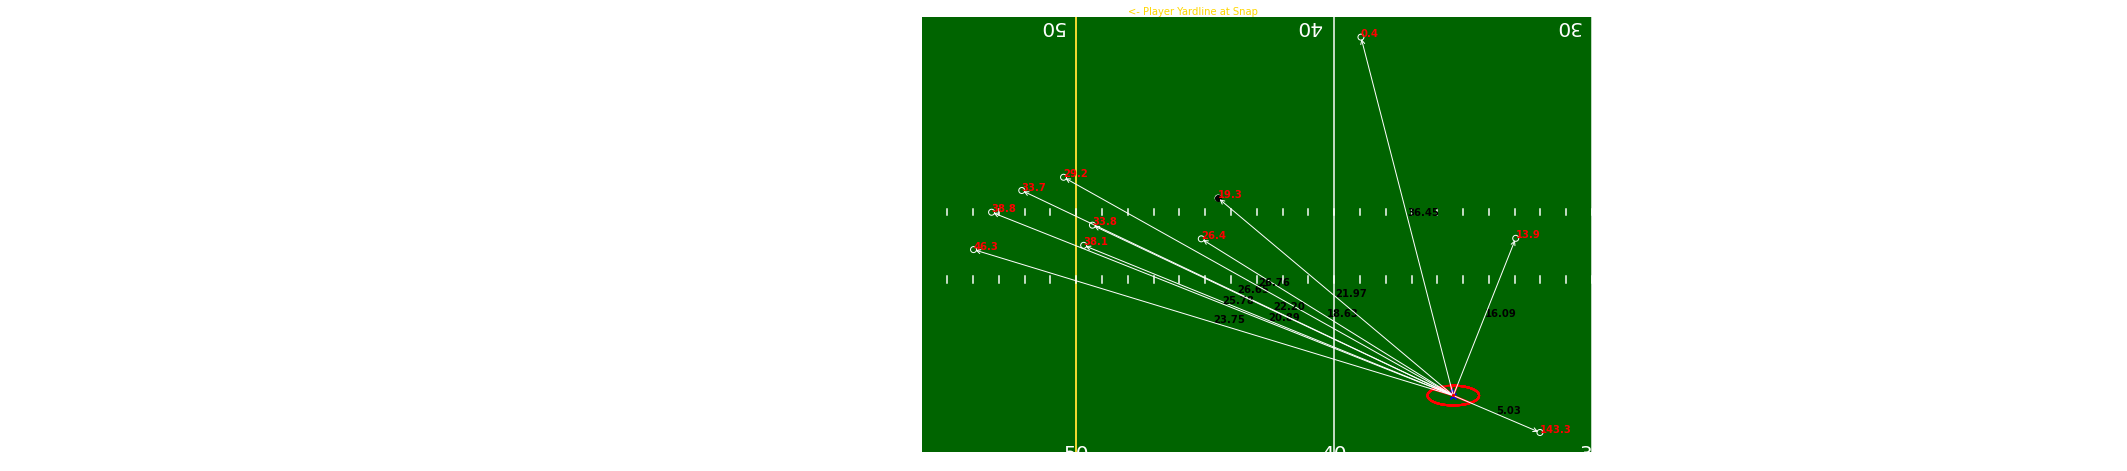

In [228]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.add_patch(rect)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white')
if True:
    plt.plot([60, 60], [0, 53.3], color='gold')
    plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
# Endzones
if True:
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
plt.xlim((tracking_sample_dist_angles["x"].min()-2,tracking_sample_dist_angles["x"].max()+2))
plt.ylim((tracking_sample_dist_angles["y"].min()-2,tracking_sample_dist_angles["y"].max()+2))
plt.axis('off')
if True:
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white', rotation=180)
if True:
    hash_range = range(11, 110)
else:
    hash_range = range(1, 120)

for x in hash_range:
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [22.91, 23.57], color='white')
    ax.plot([x, x], [29.73, 30.39], color='white')







#Add stuff to plot
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PIT"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PIT"]["y"], marker = "o", color = "white", facecolors = "None")
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PHI"]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["club"]=="PHI"]["y"], marker = "x", color = "white", facecolors = "blue")
#Highlightball carrier
plt.scatter(tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==54905]["x"],tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==54905]["y"], marker = "o", color = "black", facecolors = "black")

angle_degrees =  tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==39984]["unitDir"]
start_x = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==39984]["x"]
start_y = tracking_sample_dist_angles[tracking_sample_dist_angles["nflId"]==39984]["y"]
angle_radians = np.radians(angle_degrees) #need to flip radians because we are going opposite dirrection
length = 1
end_x = start_x + length * np.cos(angle_radians)
end_y = start_y + length * np.sin(angle_radians)

# Filter data for Darius Slay
slay_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] == 'Darius Slay']
other_players_data = tracking_sample_dist_angles[tracking_sample_dist_angles['displayName'] != 'Darius Slay']

# Extract the direction angle in radians for Darius Slay
angle_degrees_slay = slay_data["unitDir"].values[0]
angle_radians_slay = np.radians(angle_degrees_slay)



angles = []
for index, player_data in other_players_data.iterrows():
    # Calculate the relative x and y components between Nick Bosa and the player
    delta_x = player_data["x"] - slay_data["x"].values[0]
    delta_y = player_data["y"] - slay_data["y"].values[0]
    
    # Calculate the angle in radians
    angle_radians = np.arctan2(delta_y, delta_x)
    
    # Convert the angle to degrees and ensure it's within the [0, 360) range
    angle_degrees = (np.degrees(angle_radians))
    
    angles.append(angle_degrees)

#plot Bosa's arrow
arrow_props_slay = dict(facecolor='blue', edgecolor='blue', arrowstyle='->')
arrow_props_off = dict(facecolor='blue', edgecolor='white', arrowstyle='->')
plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_slay)

# Iterate through other players and create arrows
for player_data, angle_degrees_player in zip(other_players_data.iterrows(), angles):

    player_data = player_data[1]  # Extract player data from the iterrows result
    
    start_x = slay_data['x'].values[0]
    start_y = slay_data['y'].values[0]
    end_x = player_data['x']
    end_y = player_data['y']

    dx = end_x - start_x
    dy = end_y - start_y
    
    # Plot the angle
    angle_path = patches.Wedge((start_x, start_y), 1, angle_degrees_player, angle_degrees_slay, edgecolor='red', linewidth=2, fill = False)
    ax.add_patch(angle_path)
    
    if (angle_degrees_player < 0).all():
        angle_degrees_player = 360 - abs(angle_degrees_player)
    #How far away is the angle of the player from the trajectory
    angle_degrees_player = abs(slay_data["unitDir"] - angle_degrees_player)
    #Orient angle correctly for player
    if (angle_degrees_player > 180).all():
        angle_degrees_player = 360 - angle_degrees_player
        
        
    angle_text = f'{angle_degrees_player.iloc[0]:.1f}'
    ax.text(end_x, end_y, angle_text, color='red', fontweight = "bold")

    # Calculate the distance
    distance = np.sqrt(dx**2 + dy**2)
    
    # Plot the distance as text (bold)
    plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, f'{distance:.2f}', fontsize=10, color='black', fontweight="bold")

    # Create an arrow with arrowheads turned off
    plt.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrow_props_off)
    



In [229]:
tracking_sample_dist_angles[(tracking_sample_dist_angles["club"]=="PHI")]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,unitDir,unitO,c1Dist,c2Dist,c3Dist,c4Dist,c5Dist,c6Dist,c7Dist,c8Dist,c9Dist,c10Dist,bcDist,c1Ang,c2Ang,c3Ang,c4Ang,c5Ang,c6Ang,c7Ang,c8Ang,c9Ang,c10Ang,bcAng
1,2022103008,3594,39984.0,Darius Slay,35,2022-10-30 15:35:37.700000,2.0,PHI,left,74.62,11.503333,3.04,1.91,0.3,181.21,174.79,NaN,95.21,88.79,5.027644,16.092995,18.627735,20.889923,22.2022,23.751061,25.77814,26.654369,26.763412,36.446252,21.97213,143.273612,13.858716,26.423698,38.102465,33.848809,46.337402,38.768373,33.668019,29.162905,0.427073,19.313805


# Seconds Since Game Start

In [11]:
 #Apply the function nfl_clock_to_seconds
plays["timeSinceStart"] = plays.apply(nfl_clock_to_seconds,axis = 1)

In [12]:
#Display changes to variable and make sure the values are calculated correctly
display(plays[["quarter", "gameClock", "timeSinceStart"]])

,quarter,gameClock,timeSinceStart
0,4,7:52,3128
1,4,7:38,3142
2,2,8:57,1263
3,3,13:12,1908
4,2,8:33,1287
...,...,...,...
12481,1,13:31,89
12482,4,6:08,3232
12483,4,9:35,3025
12484,3,2:02,2578


In [14]:
#Display overtime values and make sure overtime values are calculated correctly
display(plays[plays["quarter"]==5][["quarter", "gameClock", "timeSinceStart"]])

,quarter,gameClock,timeSinceStart
213,5,9:47,3613
540,5,6:39,3801
579,5,3:18,4002
784,5,5:54,3846
826,5,1:15,4125
...,...,...,...
12143,5,4:55,3905
12152,5,3:13,4007
12221,5,5:26,3874
12234,5,5:13,3887


In [24]:
#Do values fall in between 0 and 4200
print(f'Min time since start:{plays["timeSinceStart"].min()}')
print(f'Max time since start:{plays["timeSinceStart"].max()}')

Min time since start:0
Max time since start:4198


In [25]:
#Does Q1 values fall in between 0 and 900 
print(f'Min time since start Q1:{plays[plays["quarter"]==1]["timeSinceStart"].min()}')
print(f'Max time since start Q1:{plays[plays["quarter"]==1]["timeSinceStart"].max()}')

Min time since start Q1:0
Max time since start Q1:899


In [26]:
#Does Q2 values fall in between 900 and 1800 
print(f'Min time since start Q2:{plays[plays["quarter"]==2]["timeSinceStart"].min()}')
print(f'Max time since start Q2:{plays[plays["quarter"]==2]["timeSinceStart"].max()}')

Min time since start Q1:900
Max time since start Q1:1798


In [27]:
#Does Q3 values fall in between 1800 and 2700
print(f'Min time since start Q3:{plays[plays["quarter"]==3]["timeSinceStart"].min()}')
print(f'Max time since start Q3:{plays[plays["quarter"]==3]["timeSinceStart"].max()}')

Min time since start Q1:1800
Max time since start Q1:2699


In [28]:
#Does Q4 values fall in between 2700 and 3600
print(f'Min time since start Q4:{plays[plays["quarter"]==4]["timeSinceStart"].min()}')
print(f'Max time since start Q4:{plays[plays["quarter"]==4]["timeSinceStart"].max()}')

Min time since start Q4:2700
Max time since start Q4:3599


In [29]:
#Does OT values fall in between 3600 and 4200
print(f'Min time since start OT:{plays[plays["quarter"]==5]["timeSinceStart"].min()}')
print(f'Max time since start OT:{plays[plays["quarter"]==5]["timeSinceStart"].max()}')

Min time since start OT:3600
Max time since start OT:4198


# Game Tackling Metrics

In [39]:
sample_tracking = tracking[(tracking["gameId"]==2022090800)]

In [41]:
display(sample_tracking)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79207,2022090800,3636,NaN,football,36,2022-09-08 23:05:27.099999,NaN,football,left,26.309999,28.690001,1.55,3.77,0.17,NaN,NaN,tackle
79208,2022090800,3636,NaN,football,37,2022-09-08 23:05:27.200000,NaN,football,left,26.209999,28.799999,1.23,3.14,0.15,NaN,NaN,NaN
79209,2022090800,3636,NaN,football,38,2022-09-08 23:05:27.299999,NaN,football,left,26.160000,28.959999,1.03,2.58,0.17,NaN,NaN,NaN
79210,2022090800,3636,NaN,football,39,2022-09-08 23:05:27.400000,NaN,football,left,26.139999,29.190001,0.95,2.30,0.23,NaN,NaN,NaN


In [43]:
game_tackling = ingame_tackling(sample_tracking)

In [45]:
display(game_tackling)

,gameId,playId,nflId,tackles_ingame,assists_ingame,ff_ingame,misses_ingame,tackle_efficiency_ingame,tackle_rating_ingame
0,2022090800,56,35472.0,0.0,0.0,0.0,0.0,NaN,NaN
22,2022090800,56,38577.0,0.0,0.0,0.0,0.0,NaN,NaN
44,2022090800,56,41239.0,0.0,0.0,0.0,0.0,NaN,NaN
66,2022090800,56,42392.0,0.0,0.0,0.0,0.0,NaN,NaN
88,2022090800,56,42489.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
79012,2022090800,3636,52647.0,4.0,1.0,0.0,0.0,1.00,0.9
79052,2022090800,3636,53490.0,1.0,0.0,0.0,0.0,1.00,1.0
79092,2022090800,3636,53678.0,0.0,0.0,0.0,0.0,NaN,NaN
79132,2022090800,3636,54650.0,1.0,2.0,0.0,1.0,0.75,0.5


# Defensive Formation

In [34]:
tracking = tracking.merge(plays, on = ["gameId", "playId"], how = "left")
tracking = tracking.merge(players, on = ["nflId"], how = "left")

In [35]:
display(tracking)

,gameId,playId,nflId,displayName_x,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,timeSinceStart,height,weight,birthDate,collegeName,position,displayName_y
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,0,6-5,325.0,1988-06-06,Indiana,G,Rodger Saffold
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,0,6-5,325.0,1988-06-06,Indiana,G,Rodger Saffold
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,0,6-5,325.0,1988-06-06,Indiana,G,Rodger Saffold
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,0,6-5,325.0,1988-06-06,Indiana,G,Rodger Saffold
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,0,6-5,325.0,1988-06-06,Indiana,G,Rodger Saffold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,3577,NaN,NaN,NaN,NaN,NaN,NaN
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,3577,NaN,NaN,NaN,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0

In [ ]:
defense['positionCat'] = defense['position'].apply(defense_pos)

# Dependent Variable: Tackle 

For the dependent variable, I am going to create four different possible variables so that we can decide later what we want to do. 1. a 0/1 to the player who made a tackle throughout the entire play 2. a 0/.5/1 to the player who made a tackle throughout the entire play 3. a 0/1 to the player who made the tackle at the exact moment 4. 0/.5/1 to the player who made the tackle at the exact moment. This way we have everything we need

In [ ]:
tracking_1 = pd.read_csv("../Data/tracking_week_1.csv")
sample_tracking = tracking_1.sample(1000)

In [ ]:
tackle_dependent_variable(tackles,tracking_1)


In [ ]:
tackles_tracking = pd.merge(tracking_1, tackles, on = ['gameId','playId','nflId'], how = 'left')
display(tackles_tracking[tackles_tracking["tackle"]==1])
print(len(tackles_tracking))

In [ ]:
tackles_tracking_dependent = pd.merge(tackles_tracking, tackle_dependent_variable(tackles,tracking_1), on = ['gameId','playId','frameId','nflId'], how = 'inner')
display(tackles_tracking_dependent.head(5))

In [ ]:
display(tackles_tracking_dependent[(tackles_tracking_dependent["gameId"]==2022091109) & (tackles_tracking_dependent["playId"]==3773) & (tackles_tracking_dependent["assist"]==1)])

In [ ]:
display(tackles_tracking_dependent[(tackles_tracking_dependent["gameId"]==2022090800) & (tackles_tracking_dependent["playId"]==56) & (tackles_tracking_dependent["tackle"]==1)])

# Force and Mass

In [4]:
tracking = tracking.merge(calculate_mass_and_force(tracking, players), on = ["gameId", "playId", "nflId", "frameId"])
display(tracking)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,147.727273,169.886364
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,147.727273,90.113636
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,147.727273,72.386364
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,147.727273,131.477273
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,147.727273,183.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,NaN,NaN
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,NaN,NaN
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,NaN,NaN


In [5]:
tracking["mass"].describe()[1:]

mean    113.914648
std      22.237678
min      69.545455
25%      93.636364
50%     109.090909
75%     137.727273
max     172.727273
Name: mass, dtype: float64

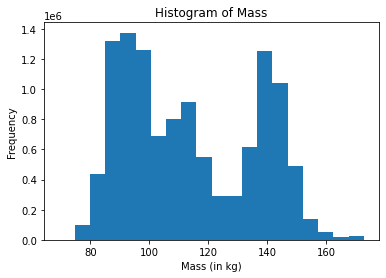

In [6]:
#plot histogram of mass variable created
plt.hist(tracking["mass"],bins = 20)
# Customize the plot (add labels, title, etc. if desired)
plt.xlabel('Mass (in kg)')
plt.ylabel('Frequency')
plt.title('Histogram of Mass')

# Display the histogram
plt.show()

In [7]:
tracking["force"].describe()[1:]

mean     191.419487
std      128.327544
min        0.000000
25%       92.886364
50%      173.954545
75%      270.327273
max     4983.745455
Name: force, dtype: float64

It looks like we have a couple outliers in Force, let's investigate.

In [15]:
display(tracking[tracking["force"]>2000])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force
2286892,2022091809,1956,43478.0,Anthony Brown,25,2022-09-18 18:01:30.799999,3.0,DAL,left,66.57,11.80,10.75,44.59,1.35,33.22,214.49,NaN,89.090909,3972.563636
2286893,2022091809,1956,43478.0,Anthony Brown,26,2022-09-18 18:01:30.900000,3.0,DAL,left,65.67,10.47,17.91,55.94,1.61,33.22,213.84,NaN,89.090909,4983.745455
2286896,2022091809,1956,43478.0,Anthony Brown,29,2022-09-18 18:01:31.200000,3.0,DAL,left,64.20,8.67,3.34,32.33,0.54,32.74,232.47,NaN,89.090909,2880.309091
2286897,2022091809,1956,43478.0,Anthony Brown,30,2022-09-18 18:01:31.299999,3.0,DAL,left,63.90,8.40,1.87,50.28,0.40,31.94,346.78,NaN,89.090909,4479.490909
2286898,2022091809,1956,43478.0,Anthony Brown,31,2022-09-18 18:01:31.400000,3.0,DAL,left,63.80,8.47,1.60,37.38,0.12,31.94,338.93,NaN,89.090909,3330.218182
2286908,2022091809,1956,43478.0,Anthony Brown,41,2022-09-18 18:01:32.400000,3.0,DAL,left,61.00,5.37,12.25,32.40,1.04,29.89,211.78,NaN,89.090909,2886.545455
2286911,2022091809,1956,43478.0,Anthony Brown,44,2022-09-18 18:01:32.700000,3.0,DAL,left,60.83,5.47,5.17,26.93,0.59,29.39,21.93,tackle,89.090909,2399.218182
2286914,2022091809,1956,43478.0,Anthony Brown,47,2022-09-18 18:01:33.000000,3.0,DAL,left,61.13,6.37,2.57,22.58,0.08,28.61,216.23,NaN,89.090909,2011.672727
2288103,2022091809,1977,43478.0,Anthony Brown,44,2022-09-18 18:02:08.299999,3.0,DAL,left,59.13,6.27,18.08,23.80,1.82,22.97,203.70,NaN,89.090909,2120.363636
2288108,2022091809,1977,43478.0,Anthony Brown,49,2022-09-18 18:02:08.799999,3.0,DAL,left,56.90,1.33,0.52,48.62,0.45,22.97,257.83,NaN,89.090909,4331.600000


In [65]:
#Check what rows are missing other than the football NAN values
print(tracking[tracking["displayName"]!="football"]["force"].isna().sum())

0


We will not have to worry about missing values for this variable as the football data will not be considered. We will just need to change those values in which the acceleration seems unreasonable.

# Ball Carrier Data


In [96]:
vars_bc_tracking = ballCarrierData(plays,tracking,players)

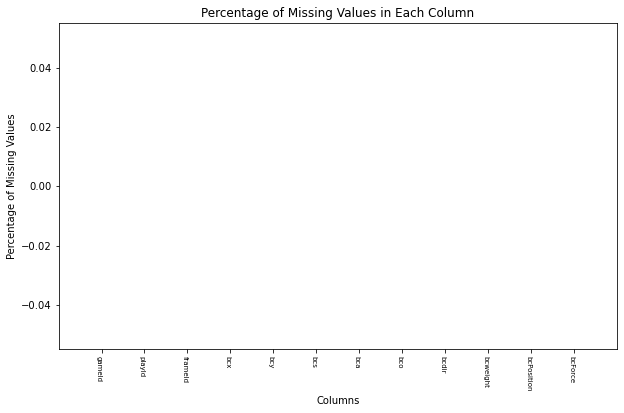

In [97]:
# Calculate the percentage of missing values for each column
missing_percentages = (vars_bc_tracking.isnull().mean() * 100).round(2)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)


plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

No missing data to look at!

### bcx

In [65]:
vars_bc_tracking ["bcx"].describe()[1:]

mean     60.424945
std      24.551611
min       3.660000
25%      40.590000
50%      60.890000
75%      80.180000
max     120.510000
Name: bcx, dtype: float64

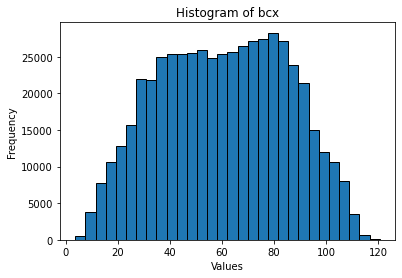

In [66]:
#Lets check the the distributions
# Create a histogram
plt.hist(vars_bc_tracking ["bcx"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bcx')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### bcy

In [67]:
vars_bc_tracking ["bcy"].describe()[1:]

mean    26.986493
std     11.644035
min     -4.430000
25%     21.390000
50%     26.980000
75%     32.570000
max     59.450000
Name: bcy, dtype: float64

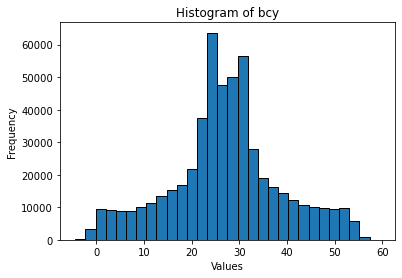

In [68]:
# Create a histogram
plt.hist(vars_bc_tracking["bcy"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bcy')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

We have a way of dealing with the position being at y, so we are good with this. 

### bcs

In [69]:
vars_bc_tracking["bcs"].describe()[1:]

mean     3.722866
std      2.537814
min      0.000000
25%      1.530000
50%      3.700000
75%      5.640000
max     10.800000
Name: bcs, dtype: float64

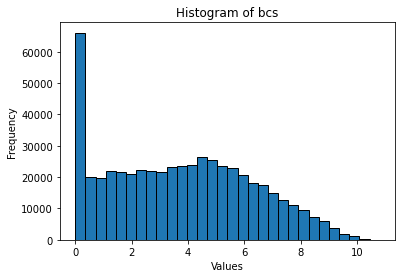

In [70]:
# Create a histogram
plt.hist(vars_bc_tracking["bcs"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bcs')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### bca

In [71]:
vars_bc_tracking["bca"].describe()[1:]

mean     2.433626
std      1.516454
min      0.000000
25%      1.290000
50%      2.360000
75%      3.470000
max     12.580000
Name: bca, dtype: float64

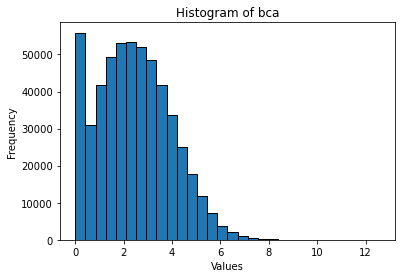

In [72]:
# Create a histogram
plt.hist(vars_bc_tracking["bca"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bca')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [73]:
vars_bc_tracking["bco"].describe()[1:]

mean    178.528584
std      99.296469
min       0.000000
25%      88.390000
50%     177.560000
75%     267.890000
max     360.000000
Name: bco, dtype: float64

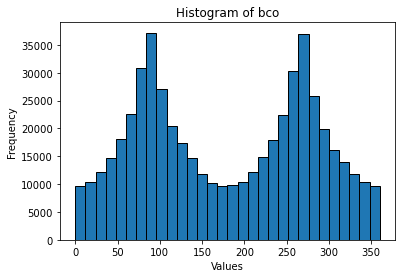

In [74]:
# Create a histogram
plt.hist(vars_bc_tracking["bco"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bco')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### bcdir

In [75]:
vars_bc_tracking["bcdir"].describe()[1:]

mean    178.238495
std     104.246587
min       0.000000
25%      87.105000
50%     177.220000
75%     268.720000
max     360.000000
Name: bcdir, dtype: float64

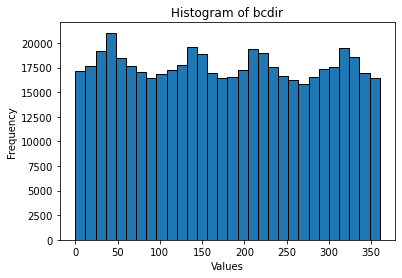

In [76]:
# Create a histogram
plt.hist(vars_bc_tracking["bcdir"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bcdir')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### bcweight

In [77]:
vars_bc_tracking["bcweight"].describe()[1:]

mean    216.505296
std      17.571303
min     153.000000
25%     207.000000
50%     215.000000
75%     225.000000
max     311.000000
Name: bcweight, dtype: float64

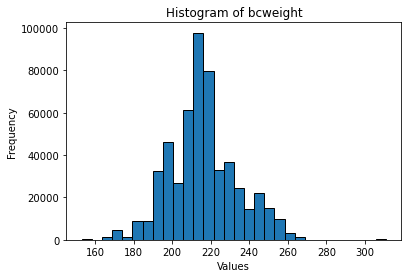

In [78]:
# Create a histogram
plt.hist(vars_bc_tracking["bcweight"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of bcweight')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [84]:
#We have an outlier above 300, lets double check
vars_bc_tracking[vars_bc_tracking["bcweight"]>300]

,gameId,playId,frameId,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcForce
35872,2022091107,3718,1,105.19,9.95,4.51,2.64,63.68,192.41,311,373.200000
35873,2022091107,3718,2,105.09,9.52,4.31,2.33,50.82,192.65,311,329.377273
35874,2022091107,3718,3,105.00,9.11,4.09,2.24,43.98,192.13,311,316.654545
35875,2022091107,3718,4,104.89,8.71,3.94,2.02,31.66,193.54,311,285.554545
35876,2022091107,3718,5,104.79,8.33,3.77,1.88,21.46,194.20,311,265.763636
...,...,...,...,...,...,...,...,...,...,...,...
527994,2022110700,2182,29,87.96,1.49,3.81,6.27,242.87,137.97,311,886.350000
527995,2022110700,2182,30,88.21,1.23,3.22,5.99,244.38,135.27,311,846.768182
527996,2022110700,2182,31,88.35,1.06,2.37,6.00,248.43,134.59,311,848.181818
527997,2022110700,2182,32,88.47,0.90,1.76,5.39,258.70,135.45,311,761.950000


In [86]:
plays[(plays["gameId"]==2022091107)&(plays["playId"]==3718)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
7030,2022091107,3718,45268,Patrick Ricard,(4:11) (Shotgun) L.Jackson pass short left to ...,4,1,14,BAL,NYJ,BAL,3,4:11,3,24,C,2.0,NaN,7,7,N,107,PISTOL,7.0,0.11954,0.001398,0.998602,0.000137,-0.000137,-0.532879,0.435391,NaN,NaN,NaN,NaN


In [87]:
players[players["nflId"]==45268]

,nflId,height,weight,birthDate,collegeName,position,displayName
536,45268,6-3,311,1994-05-27,Maine,FB,Patrick Ricard


### bcForce

In [79]:
vars_bc_tracking["bcForce"].describe()[1:]

mean     239.053319
std      150.097830
min        0.000000
25%      126.068182
50%      231.081818
75%      340.886364
max     1351.763636
Name: bcForce, dtype: float64

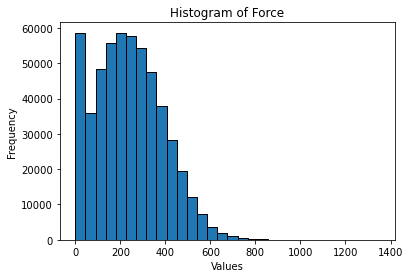

In [80]:
# Create a histogram
plt.hist(vars_bc_tracking["bcForce"], bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of Force')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### bcPosition

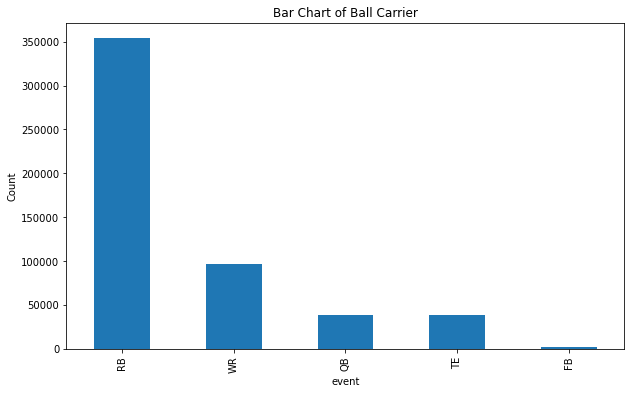

In [101]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
vars_bc_tracking["bcPosition"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of Ball Carrier')
plt.xlabel("event")
plt.ylabel('Count')
plt.show()

### Check one play to make sure everything lines up correctly

In [99]:
vars_bc_tracking[(vars_bc_tracking["gameId"]==2022100908)&(vars_bc_tracking["playId"]==3537)]

,gameId,playId,frameId,bcx,bcy,bcs,bca,bco,bcdir,bcweight,bcPosition,bcForce
284466,2022100908,3537,1,63.87,29.23,2.53,1.70,120.72,244.93,261,TE,201.681818
284467,2022100908,3537,2,63.62,29.13,2.55,1.01,114.59,246.51,261,TE,119.822727
284468,2022100908,3537,3,63.38,29.02,2.60,0.54,124.61,247.46,261,TE,64.063636
284469,2022100908,3537,4,63.11,28.92,2.79,0.81,138.22,249.73,261,TE,96.095455
284470,2022100908,3537,5,62.83,28.82,3.02,1.17,168.35,250.65,261,TE,138.804545
284471,2022100908,3537,6,62.52,28.72,3.30,1.62,225.64,252.68,261,TE,192.190909
284472,2022100908,3537,7,62.20,28.63,3.36,1.22,240.70,254.14,261,TE,144.736364
284473,2022100908,3537,8,61.88,28.54,3.30,0.67,246.71,255.56,261,TE,79.486364
284474,2022100908,3537,9,61.57,28.47,3.16,0.97,263.12,257.71,261,TE,115.077273
284475,2022100908,3537,10,61.30,28.42,2.55,2.67,252.25,259.34,261,TE,316.759091


In [89]:
plays[(plays["gameId"]==2022100908)&(plays["playId"]==3537)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.00611,0.00611,2.360609,0.981955,NaN,NaN,NaN,NaN


In [93]:
players[players["nflId"]==48723]

,nflId,height,weight,birthDate,collegeName,position,displayName
984,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse


In [92]:
tracking[(tracking["gameId"]==2022100908)&(tracking["playId"]==3537)&(tracking["nflId"]==48723)]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6543216,2022100908,3537,48723.0,Parker Hesse,1,2022-10-09 15:43:13.299999,46.0,ATL,left,63.87,29.23,2.53,1.70,0.26,120.72,244.93,NaN
6543217,2022100908,3537,48723.0,Parker Hesse,2,2022-10-09 15:43:13.400000,46.0,ATL,left,63.62,29.13,2.55,1.01,0.27,114.59,246.51,pass_arrived
6543218,2022100908,3537,48723.0,Parker Hesse,3,2022-10-09 15:43:13.500000,46.0,ATL,left,63.38,29.02,2.60,0.54,0.27,124.61,247.46,NaN
6543219,2022100908,3537,48723.0,Parker Hesse,4,2022-10-09 15:43:13.599999,46.0,ATL,left,63.11,28.92,2.79,0.81,0.28,138.22,249.73,NaN
6543220,2022100908,3537,48723.0,Parker Hesse,5,2022-10-09 15:43:13.700000,46.0,ATL,left,62.83,28.82,3.02,1.17,0.30,168.35,250.65,NaN
6543221,2022100908,3537,48723.0,Parker Hesse,6,2022-10-09 15:43:13.799999,46.0,ATL,left,62.52,28.72,3.30,1.62,0.32,225.64,252.68,pass_outcome_caught
6543222,2022100908,3537,48723.0,Parker Hesse,7,2022-10-09 15:43:13.900000,46.0,ATL,left,62.20,28.63,3.36,1.22,0.33,240.70,254.14,NaN
6543223,2022100908,3537,48723.0,Parker Hesse,8,2022-10-09 15:43:14.000000,46.0,ATL,left,61.88,28.54,3.30,0.67,0.34,246.71,255.56,NaN
6543224,2022100908,3537,48723.0,Parker Hesse,9,2022-10-09 15:43:14.099999,46.0,ATL,left,61.57,28.47,3.16,0.97,0.32,263.12,257.71,NaN
6543225,2022100908,3537,48723.0,Parker Hesse,10,2022-10-09 15:43:14.200000,46.0,ATL,left,61.30,28.42,2.55,2.67,0.27,252.25,259.34,NaN


Everything here looks good.

# Home variable and probabilityDefenseWinProbability

In [7]:
tracking = tracking.merge(presnapDefenseWinProbability(games, tracking, plays), on = ["gameId", "playId", "nflId", "frameId"])

In [16]:
tracking[["gameId","playId","nflId","club", "home", "preSnapWinProbabilityDefense"]].\
    drop_duplicates().reset_index(drop=True).\
    merge(players[["nflId","position"]], on = "nflId").\
    merge(games, on = "gameId").\
    merge(plays[["gameId", "playId", "defensiveTeam","preSnapHomeTeamWinProbability"]], on = ["gameId", "playId"])

,gameId,playId,nflId,club,home,preSnapWinProbabilityDefense,position,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,defensiveTeam,preSnapHomeTeamWinProbability
0,2022090800,56,35472.0,BUF,0,0.413347,G,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,LA,0.413347
1,2022090800,56,38577.0,LA,1,0.413347,ILB,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,LA,0.413347
2,2022090800,56,41239.0,LA,1,0.413347,DT,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,LA,0.413347
3,2022090800,56,42392.0,BUF,0,0.413347,C,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,LA,0.413347
4,2022090800,56,42489.0,BUF,0,0.413347,WR,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,LA,0.413347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274621,2022091200,3826,44873.0,SEA,1,0.508994,FS,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16,SEA,0.508994
274622,2022091200,3826,52526.0,DEN,0,0.508994,TE,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16,SEA,0.508994
274623,2022091200,3826,54505.0,SEA,1,0.508994,OLB,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16,SEA,0.508994
274624,2022091200,3826,43384.0,DEN,0,0.508994,G,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16,SEA,0.508994


The binary variable and the preSnapProbablityDefense lools good as they are matching up correctly.

# Game Misc

In [123]:
games = pd.read_csv("../Data/games.csv")
display(games)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [124]:
games_surf = games.merge(game_miscs(), on = "gameId", how = "left")

2022 done.
Downcasting floats.


In [125]:
display(games_surf)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,surface,inside_outside
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,turf,inside
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27,turf,inside
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26,grass,outside
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10,grass,outside
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23,turf,outside
...,...,...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20,grass,outside
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31,grass,outside
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13,grass,outside
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17,grass,outside


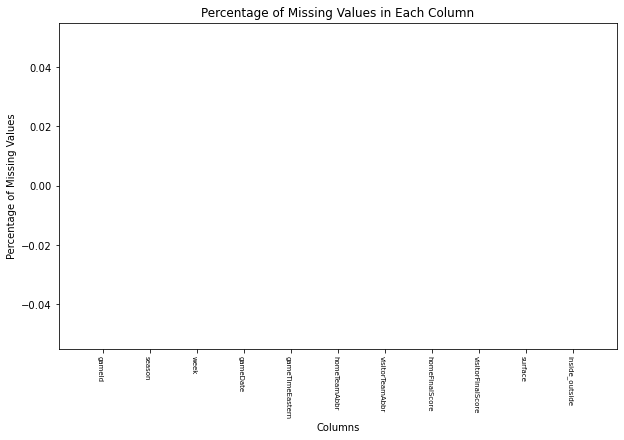

In [126]:
# Calculate the percentage of missing values for each column
missing_percentages = (games_surf.isnull().mean() * 100).round(2)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentages.index, missing_percentages.values, color='skyblue')

# Annotate bars with percentages for values greater than 0
annotations = []
for bar, percentage in zip(bars, missing_percentages):
    if percentage > 0:
        annotation = plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1,
                              f'{percentage}%', ha='center', va='bottom', fontsize=10)
        annotations.append(annotation)

# Adjust the rotation and font size of x-axis labels
plt.xticks(rotation=270, ha='right', fontsize=7)


plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

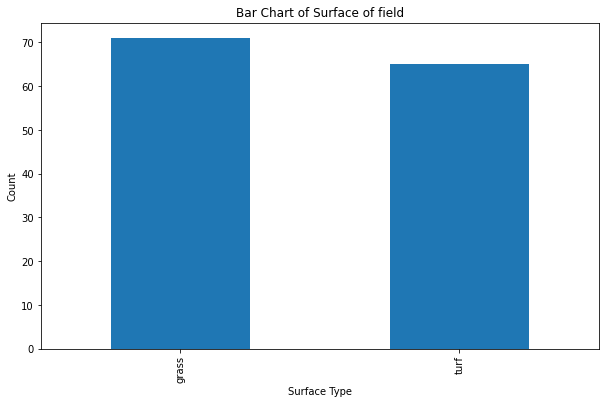

In [127]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
games_surf["surface"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of Surface of field')
plt.xlabel("Surface Type")
plt.ylabel('Count')
plt.show()

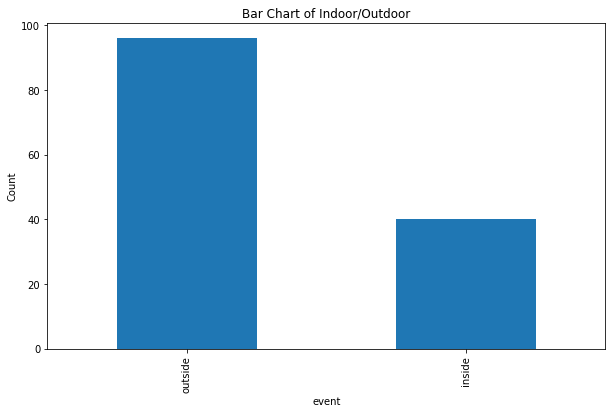

In [128]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
games_surf["inside_outside"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of Indoor/Outdoor')
plt.xlabel("event")
plt.ylabel('Count')
plt.show()

In [129]:
games_surf = games.merge(game_miscs(False), on = "gameId", how = "left")

2022 done.
Downcasting floats.


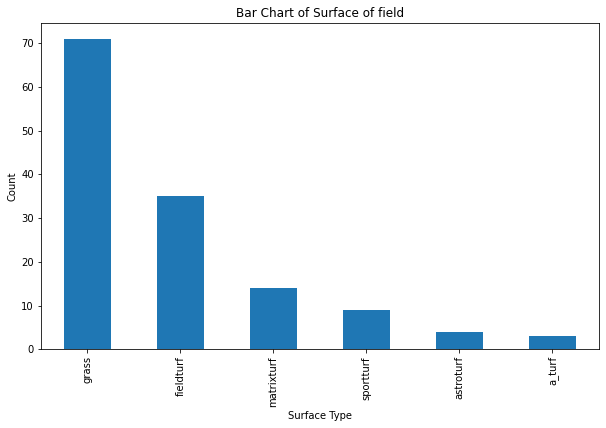

In [130]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
games_surf["surface"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of Surface of field')
plt.xlabel("Surface Type")
plt.ylabel('Count')
plt.show()

# Play Types

In [16]:
plays['playType'] = plays['playDescription'].apply(play_type)
display(plays)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,pass
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,run
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,pass
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,run
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,WAS,39,13:31,0,0,NaN,NaN,NaN,1,1,N,49,SINGLEBACK,6.0,0.577800,0.638600,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN,run
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,SEA,30,6:08,17,16,C,0.0,NaN,2,2,N,40,SINGLEBACK,7.0,0.298983,0.615241,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN,pass
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,CIN,41,9:35,26,21,NaN,NaN,NaN,6,6,N,69,SHOTGUN,6.0,0.639439,0.667054,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN,run
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,TEN,34,2:02,17,24,NaN,NaN,NaN,-2,-2,N,44,SHOTGUN,6.0,0.518695,0.410611,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN,run


In [18]:
tracking_plays = tracking.merge(plays, on = ["gameId", "playId"])
display(tracking_plays)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,147.727273,169.886364,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,147.727273,90.113636,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,147.727273,72.386364,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,147.727273,131.477273,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,147.727273,183.181818,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,run
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,run
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,run
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Wash

In [32]:
#Subsetting our data such that we obtain all the events on a given play
tracking_plays_sub = tracking_plays[['gameId', 'playId', 'frameId', 'event', 'ballCarrierId', 
                'ballCarrierDisplayName', 'playDescription', 'playType']].drop_duplicates().reset_index(drop=True)
tracking_plays_sub_event = tracking_plays_sub[tracking_plays_sub["event"].notna()].reset_index(drop=True)
#match the position with ball carrier
tracking_plays_sub_event = tracking_plays_sub_event.merge(players[["nflId", "position"]], left_on = "ballCarrierId",
                                                         right_on = "nflId")
display(tracking_plays_sub_event)

,gameId,playId,frameId,event,ballCarrierId,ballCarrierDisplayName,playDescription,playType,nflId,position
0,2022090800,56,2,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,pass,42489,WR
1,2022090800,56,6,pass_outcome_caught,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,pass,42489,WR
2,2022090800,56,18,tackle,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,pass,42489,WR
3,2022090800,167,3,pass_arrived,42489,Stefon Diggs,(11:54) (Shotgun) J.Allen pass short middle to...,pass,42489,WR
4,2022090800,167,6,pass_outcome_caught,42489,Stefon Diggs,(11:54) (Shotgun) J.Allen pass short middle to...,pass,42489,WR
...,...,...,...,...,...,...,...,...,...,...
48040,2022110700,518,6,pass_outcome_caught,33130,DeSean Jackson,(6:35) L.Jackson pass deep left to D.Jackson t...,pass,33130,WR
48041,2022110700,518,13,tackle,33130,DeSean Jackson,(6:35) L.Jackson pass deep left to D.Jackson t...,pass,33130,WR
48042,2022110700,1298,3,pass_arrived,33130,DeSean Jackson,(9:00) (Shotgun) L.Jackson pass deep right to ...,pass,33130,WR
48043,2022110700,1298,6,pass_outcome_caught,33130,DeSean Jackson,(9:00) (Shotgun) L.Jackson pass deep right to ...,pass,33130,WR


In [49]:
#Check to see if all plays have either "handoff,run,or pass_outcome_caught, lateral"

# Define the list of events to check for
desired_events = ['handoff', 'run', 'pass_outcome_caught', 'lateral', 'snap_direct']

# Group by 'gameId' and 'playId' and check if any of the desired events are present for each group
result = tracking_plays_sub_event.groupby(['gameId', 'playId'])['event'].apply(lambda x: any(e in x.values for e in desired_events))

display(sum(~result)) 

5

5 plays did not have one of those. Lets investigate

In [50]:
combinations_not_meeting_condition = result[~result].index
filtered_df = tracking_plays_sub_event[tracking_plays_sub_event.set_index(['gameId', 'playId']).index.isin(combinations_not_meeting_condition)].reset_index(drop=True)
display(filtered_df)

,gameId,playId,frameId,event,ballCarrierId,ballCarrierDisplayName,playDescription,playType,nflId,position
0,2022091102,4102,6,ball_snap,53432,Trey Lance,(2:24) (Shotgun) T.Lance to SF 15 for -5 yards...,other,53432,QB
1,2022091102,4102,17,fumble,53432,Trey Lance,(2:24) (Shotgun) T.Lance to SF 15 for -5 yards...,other,53432,QB
2,2022100207,1597,6,ball_snap,33084,Matt Ryan,(5:58) (Shotgun) M.Ryan up the middle to IND 4...,run,33084,QB
3,2022100207,1597,39,qb_sack,33084,Matt Ryan,(5:58) (Shotgun) M.Ryan up the middle to IND 4...,run,33084,QB
4,2022100207,1597,59,fumble,33084,Matt Ryan,(5:58) (Shotgun) M.Ryan up the middle to IND 4...,run,33084,QB
5,2022091110,3767,6,ball_snap,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,other,54716,RB
6,2022091110,3767,13,fumble,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,other,54716,RB
7,2022091110,3767,17,fumble_offense_recovered,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,other,54716,RB
8,2022092503,700,6,ball_snap,52413,Tua Tagovailoa,(4:48) (No Huddle) T.Tagovailoa up the middle ...,run,52413,QB
9,2022092503,700,12,first_contact,52413,Tua Tagovailoa,(4:48) (No Huddle) T.Tagovailoa up the middle ...,run,52413,QB


These plays are weird, so we do not need need to inlcude this in our data. This indicates that we can remove our frames prior to the event. We can also remove any frames in which the play has ended as indication in the function below. Lets test it.

In [53]:
unique_combinations = tracking[["gameId","playId"]].drop_duplicates()
print("Number of unique plays prior to removing frame:",len(unique_combinations))

Number of unique plays prior to removing frame: 12486


In [88]:
def filter_frames_by_events(data):
    # Define start and end events
    start_events = ['run', 'handoff', 'pass_outcome_caught', 'lateral', 'snap_direct']
    end_events = ['out_of_bounds', 'touchdown', 'fumble', 'qb_slide', 'tackle', 'safety']

    # Function to filter frames for a single play
    def filter_frames(play_data):
        # Find the first frame of the start events
        start_frame = play_data[play_data['event'].isin(start_events)]['frameId'].min()
        
        # Find the last frame before any of the end events
        end_frame = play_data[play_data['event'].isin(end_events)]['frameId'].min()

        # If start_frame or end_frame is NaN, return an empty DataFrame
        if pd.isna(start_frame) or pd.isna(end_frame):
            return pd.DataFrame()
        
        # Filter the play_data for frames between start_frame and end_frame
        return play_data[(play_data['frameId'] >= start_frame) & (play_data['frameId'] <= end_frame)]

    # Group by game and play, apply the filter_frames function, and concatenate the results
    filtered_data = data.groupby(['gameId', 'playId']).apply(filter_frames)
    
    # Reset the index and return the result
    return filtered_data.reset_index(drop=True)

In [89]:
tracking_filter = filter_frames_by_events(tracking)
unique_combinations = tracking_filter[["gameId","playId"]].drop_duplicates()
print("number of unique plays prior to removing frams:", len(unique_combinations))

number of unique plays prior to removing frams: 12474


In [90]:
unique_pairs_full = tracking[['gameId', 'playId']].drop_duplicates()
unique_pairs_filtered = tracking_filter[['gameId', 'playId']].drop_duplicates()
ds1 = set(map(tuple, unique_pairs_full.values))
ds2 = set(map(tuple, unique_pairs_filtered.values))
diff = pd.DataFrame(list(ds1.difference(ds2)), columns = ["gameId","playId"])
diff = diff.merge(tracking)
diff = diff.merge(plays, on = ["gameId", "playId"])
display(diff)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022091110,3767,33138.0,Chad Henne,1,2022-09-11 19:15:26.799999,4.0,KC,left,101.790000,29.880000,0.00,0.00,0.00,261.05,241.38,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
1,2022091110,3767,33138.0,Chad Henne,2,2022-09-11 19:15:26.900000,4.0,KC,left,101.790000,29.880000,0.00,0.00,0.00,261.05,238.19,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
2,2022091110,3767,33138.0,Chad Henne,3,2022-09-11 19:15:27.000000,4.0,KC,left,101.790000,29.880000,0.00,0.00,0.00,261.93,238.49,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
3,2022091110,3767,33138.0,Chad Henne,4,2022-09-11 19:15:27.099999,4.0,KC,left,101.790000,29.880000,0.00,0.00,0.00,262.93,238.35,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
4,2022091110,3767,33138.0,Chad Henne,5,2022-09-11 19:15:27.200000,4.0,KC,left,101.790000,29.880000,0.00,0.08,0.00,262.93,110.63,NaN,100.909091,8.072727,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,2022091807,3597,NaN,football,74,2022-09-18 18:58:31.599999,NaN,football,left,118.489998,50.720001,0.42,1.25,1.17,NaN,NaN,safety,NaN,NaN,46830,Brandon Powell,(:13) (Run formation) B.Powell right end ran o...,4,4,7,LA,ATL,LA,26,0:13,31,25,NaN,NaN,NaN,-26,-26,N,84,SHOTGUN,NaN,0.059712,0.995626,0.004374,-0.000174,0.000174,0.007420,-2.007420,NaN,NaN,NaN,NaN,run
10277,2022091807,3597,NaN,football,75,2022-09-18 18:58:31.700000,NaN,football,left,118.570000,50.889999,0.32,0.99,0.18,NaN,NaN,NaN,NaN,NaN,46830,Brandon Powell,(:13) (Run formation) B.Powell right end ran o...,4,4,7,LA,ATL,LA,26,0:13,31,25,NaN,NaN,NaN,-26,-26,N,84,SHOTGUN,NaN,0.059712,0.995626,0.004374,-0.000174,0.000174,0.007420,-2.007420,NaN,NaN,NaN,NaN,run
10278,2022091807,3597,NaN,football,76,2022-09-18 18:58:31.799999,NaN,football,left,118.580002,50.910000,0.23,0.74,0.03,NaN,NaN,NaN,NaN,NaN,46830,Brandon Powell,(:13) (Run formation) B.Powell right end ran o...,4,4,7,LA,ATL,LA,26,0:13,31,25,NaN,NaN,NaN,-26,-26,N,84,SHOTGUN,NaN,0.059712,0.995626,0.004374,-0.000174,0.000174,0.007420,-2.007420,NaN,NaN,NaN,NaN,run
10279,2022091807,3597,NaN,football,77,2022-09-18 18:58:31.900000,NaN,football,left,118.769997,51.240002,0.19,0.60,0.38,NaN,NaN,NaN,NaN,NaN,46830,Brandon Powell,(:13) (

In [91]:
samp_play = diff[(diff["gameId"]==2022091110)&(diff["playId"]==3767)&(diff["nflId"]==33138)]
display(samp_play)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022091110,3767,33138.0,Chad Henne,1,2022-09-11 19:15:26.799999,4.0,KC,left,101.79,29.88,0.00,0.00,0.00,261.05,241.38,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
1,2022091110,3767,33138.0,Chad Henne,2,2022-09-11 19:15:26.900000,4.0,KC,left,101.79,29.88,0.00,0.00,0.00,261.05,238.19,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
2,2022091110,3767,33138.0,Chad Henne,3,2022-09-11 19:15:27.000000,4.0,KC,left,101.79,29.88,0.00,0.00,0.00,261.93,238.49,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
3,2022091110,3767,33138.0,Chad Henne,4,2022-09-11 19:15:27.099999,4.0,KC,left,101.79,29.88,0.00,0.00,0.00,262.93,238.35,NaN,100.909091,0.000000,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
4,2022091110,3767,33138.0,Chad Henne,5,2022-09-11 19:15:27.200000,4.0,KC,left,101.79,29.88,0.00,0.08,0.00,262.93,110.63,NaN,100.909091,8.072727,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
5,2022091110,3767,33138.0,Chad Henne,6,2022-09-11 19:15:27.299999,4.0,KC,left,101.79,29.88,0.03,0.35,0.00,264.49,103.18,ball_snap,100.909091,35.318182,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
6,2022091110,3767,33138.0,Chad Henne,7,2022-09-11 19:15:27.400000,4.0,KC,left,101.80,29.88,0.09,0.46,0.01,264.49,95.54,NaN,100.909091,46.418182,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
7,2022091110,3767,33138.0,Chad Henne,8,2022-09-11 19:15:27.500000,4.0,KC,left,101.82,29.88,0.19,0.76,0.02,263.45,90.05,NaN,100.909091,76.690909,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
8,2022091110,3767,33138.0,Chad Henne,9,2022-09-11 19:15:27.599999,4.0,KC,left,101.85,29.88,0.29,0.82,0.03,263.45,92.14,NaN,100.909091,82.745455,54716,Isiah Pacheco,(5:05) QB-#4 Henne in at QB C.Henne to KC 10 f...,4,1,10,KC,ARI,KC,10,5:05,21,44,NaN,NaN,NaN,0,0,N,100,I_FORM,7.0,0.046114,0.001049,0.998951,0.000077,-0.000077,0.408257,-0.374468,NaN,NaN,NaN,NaN,other
9,2022091110,3767,33138.0,Chad Henne,10,2022-

In [92]:
#Subsetting our data such that we obtain all the events on a given play
tracking_plays_sub_diff = diff[['gameId', 'playId', 'frameId', 'event']].drop_duplicates().reset_index(drop=True)
tracking_plays_sub_event_diff = tracking_plays_sub_diff[tracking_plays_sub_diff["event"].notna()].reset_index(drop=True)
display(tracking_plays_sub_event_diff)

,gameId,playId,frameId,event
0,2022091110,3767,6,ball_snap
1,2022091110,3767,13,fumble
2,2022091110,3767,17,fumble_offense_recovered
3,2022092511,3382,6,ball_snap
4,2022092511,3382,21,fumble
5,2022092511,3382,24,handoff
6,2022092511,3382,22,autoevent_passforward
7,2022092503,700,6,ball_snap
8,2022092503,700,12,first_contact
9,2022092503,700,28,tackle


In [93]:
tracking_plays_sub_event_diff["event"].value_counts()

ball_snap                    10
fumble                        5
handoff                       4
autoevent_passforward         3
first_contact                 3
fumble_offense_recovered      2
pass_outcome_caught           2
autoevent_passinterrupted     2
fumble_defense_recovered      2
safety                        2
tackle                        1
qb_sack                       1
touchdown                     1
pass_arrived                  1
out_of_bounds                 1
run                           1
Name: event, dtype: int64

So what does this tell us, our data mostly includes data with a clear ball carrier on all plays. That is the qb ran, gave a later, passed the ball off, or handed the ball off. There are 14 plays that we are not considering. I will need to continue to run through my thoughts....

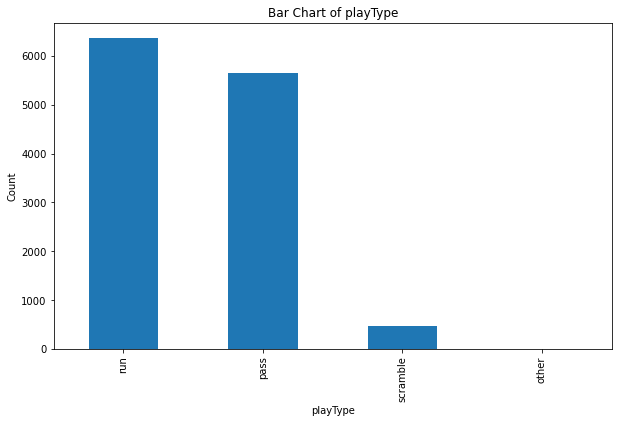

In [95]:
# Create a bar chart - quarter variable
plt.figure(figsize=(10, 6))

# Set the order of quarters .loc[quarter_order]
#quarter_order = [1, 2, 3, 4]

plays["playType"].value_counts(dropna = False).plot(kind='bar') #include NA values
plt.title(f'Bar Chart of playType')
plt.xlabel("playType")
plt.ylabel('Count')
plt.show()

In [96]:
plays["playType"].value_counts()

run         6363
pass        5646
scramble     471
other          6
Name: playType, dtype: int64

In [101]:
#Do all run plays have handoff in them
# Get a list of unique 'gameId' and 'playId' combinations where "handoff" is present in run plays
run_plays_with_handoff_combinations = tracking_plays[(tracking_plays['event'] == 'handoff') & (tracking_plays['playId'].isin(tracking_plays[tracking_plays['event'] == 'run']['playId']))][['gameId', 'playId']].values.tolist()

# Filter the original DataFrame to exclude rows with the identified combinations
filtered_df = tracking_plays[~tracking_plays.set_index(['gameId', 'playId']).index.isin(run_plays_with_handoff_combinations)].reset_index(drop=True)
display(filtered_df)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,147.727273,169.886364,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,147.727273,90.113636,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,147.727273,72.386364,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,147.727273,131.477273,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,147.727273,183.181818,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597426,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,run
10597427,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,run
10597428,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,run
10597429,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Wash

In [104]:
tracking_plays[(tracking_plays["gameId"]==2022110700)&(tracking_plays["playId"]==3787) &(tracking_plays["displayName"]=="football")]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,mass,force,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
12187354,2022110700,3787,NaN,football,1,2022-11-07 23:06:45.299999,NaN,football,right,20.629999,23.670000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187355,2022110700,3787,NaN,football,2,2022-11-07 23:06:45.400000,NaN,football,right,20.629999,23.670000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187356,2022110700,3787,NaN,football,3,2022-11-07 23:06:45.500000,NaN,football,right,20.629999,23.670000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187357,2022110700,3787,NaN,football,4,2022-11-07 23:06:45.599999,NaN,football,right,20.629999,23.670000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187358,2022110700,3787,NaN,football,5,2022-11-07 23:06:45.700000,NaN,football,right,20.629999,23.670000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187359,2022110700,3787,NaN,football,6,2022-11-07 23:06:45.799999,NaN,football,right,20.629999,23.670000,0.00,0.00,0.00,NaN,NaN,ball_snap,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187360,2022110700,3787,NaN,football,7,2022-11-07 23:06:45.900000,NaN,football,right,19.280001,23.780001,7.72,0.34,1.35,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187361,2022110700,3787,NaN,football,8,2022-11-07 23:06:46.000000,NaN,football,right,18.600000,23.799999,7.61,1.49,0.68,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187362,2022110700,3787,NaN,football,9,2022-11-07 23:06:46.099999,NaN,football,right,18.100000,23.879999,6.94,5.37,0.50,NaN,NaN,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.07223,-0.07223,NaN,NaN,NaN,NaN,run
12187363,2022110700,3787,NaN,football,10,2022-11-07 23:06:46.200000,NaN,f

In [28]:
#Checking function
play_type_df = play_type(plays,tracking)
display(play_type_df)

,gameId,playId,play_type
0,2022090800,56,pass
1,2022090800,80,qb_run
2,2022090800,101,run
3,2022090800,122,pass
4,2022090800,146,run
...,...,...,...
12481,2022110700,3658,run
12482,2022110700,3686,run
12483,2022110700,3707,run
12484,2022110700,3740,run


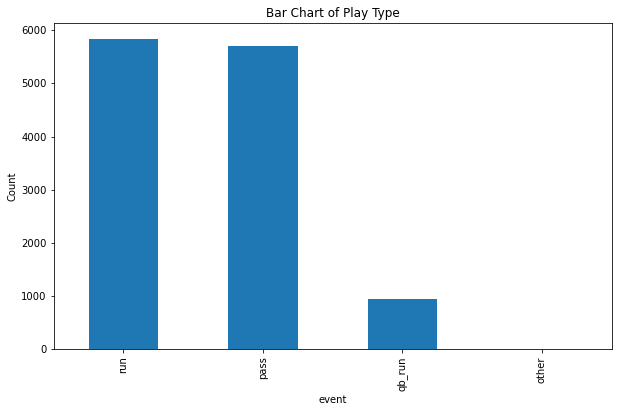

In [29]:
# Create a bar chart - offenseFormation
plt.figure(figsize=(10, 6))
play_type_df["play_type"].value_counts().plot(kind='bar') #include NA values
plt.title(f'Bar Chart of Play Type')
plt.xlabel("event")
plt.ylabel('Count')
plt.show()

In [30]:
play_type_df["play_type"].value_counts()

run       5839
pass      5699
qb_run     941
other        7
Name: play_type, dtype: int64

In [31]:
#Lets check out those plays are "Other"
plays_tracking = plays.merge(tracking, on = ["gameId", "playId"])
other_plays = play_type_df[play_type_df["play_type"]=="other"].merge(plays_tracking, on = ["gameId", "playId"])

In [32]:
bc_event = other_plays[other_plays["event"].notna()][['gameId', 'playId', 'frameId', 'event']].drop_duplicates().reset_index(drop=True)
display(bc_event)

,gameId,playId,frameId,event
0,2022091102,4102,6,ball_snap
1,2022091102,4102,17,fumble
2,2022091110,3767,6,ball_snap
3,2022091110,3767,13,fumble
4,2022091110,3767,17,fumble_offense_recovered
5,2022091805,580,6,snap_direct
6,2022091805,580,38,first_contact
7,2022091805,580,48,tackle
8,2022092503,700,6,ball_snap
9,2022092503,700,12,first_contact


Everything with this feature looks good as we are probably removing these data points with too much confusion.